In [346]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [4]:
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [5]:
# Data display coustomization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [6]:
# To perform time series forecasting

from statsmodels.tsa.seasonal import seasonal_decompose,STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn import metrics

from sklearn.model_selection import GridSearchCV


***
<h1><div style="text-align: Left">Analysis and Solutions</div></h1>


***
<h2>1. Read the data as an appropriate Time Series data and plot the data.</h2>
<br>
<h3>Solution:</h3>

In [7]:
#Reading data for Sparkling Wine 
print(color.BOLD + color.DARKCYAN+'Sales Data for Sparkling Wine')
Sparkling = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True,index_col=0)

Sparkling_df=pd.DataFrame(Sparkling)
Sparkling.head()

Sales Data for Sparkling Wine


YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64

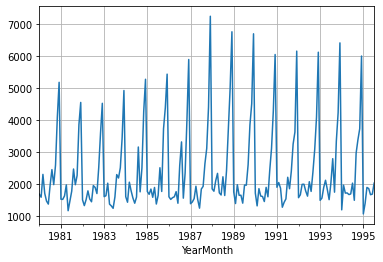

In [8]:
Sparkling.plot();
plt.grid()

In [9]:
#Reading data for Rose Wine 
print(color.BOLD + color.DARKCYAN+'Sales Data for Rose Wine')
Rose = pd.read_csv("Rose.csv",parse_dates=True,squeeze=True,index_col=0)

Rose.head()

Sales Data for Rose Wine


YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01    99.0 
1980-05-01    116.0
Name: Rose, dtype: float64

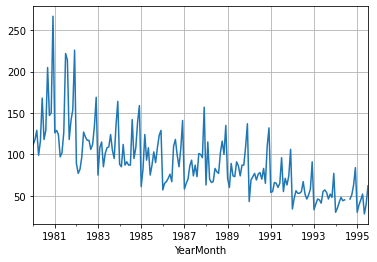

In [10]:
Rose.plot();
plt.grid()

<h2> Observations:</h2>


Data represents sales trend for Sparkling and Rose wine from year 1980 to 1995.

<b>Sparkling wine:</b>

    Data values are stored in correct time order and no data is missing.
    The sales are increasing in numbers till year 1988 and decreasing post 1988, implying presence of trend component.
    Intra-year stable fluctuations are indicative of seasonal component.
    As trend changes, fluctuations are also changes. This is indicative of multiplicative seasonality.

<b>Rose wine:</b>

    Data values are stored in correct time order and there are missing records.
    The sales are decreasing in numbers, implying presence of trend component.
    Intra-year stable fluctuations are indicative of seasonal component.
    As trend changes, fluctuations are also changes. This is indicative of multiplicative seasonality.


***
<h2>2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.</h2>
<br>
<h3>Solution:</h3>

<h2> Data Inspection </h2>

In [11]:
print(color.BOLD + color.BLUE+'Insights into Sparkling Wine Dataset:')

Insights into Sparkling Wine Dataset:


In [12]:
print(color.BOLD + color.DARKCYAN+'Sparling wine dataset has',Sparkling.shape[0],'rows i.e. monthly sales record from 1980-01 to 1995-07.')

print(color.BOLD + color.DARKCYAN+"Missing value count:",Sparkling.isnull().sum())

Sparling wine dataset has 187 rows i.e. monthly sales record from 1980-01 to 1995-07.
Missing value count: 0


In [13]:
print(color.BOLD + color.BLUE+'Insights into Rose Wine Dataset:')

Insights into Rose Wine Dataset:


In [14]:


print(color.BOLD + color.DARKCYAN+'Rose wine dataset has',Rose.shape[0],'rows i.e. monthly sales record from 1980-01 to 1995-07, but there are missing values for 1994-07-01 and 1994-08-01')

print(color.BOLD + color.DARKCYAN+"Missing value count:",Rose.isnull().sum())

Rose[Rose.isnull()]

Rose wine dataset has 187 rows i.e. monthly sales record from 1980-01 to 1995-07, but there are missing values for 1994-07-01 and 1994-08-01
Missing value count: 2


YearMonth
1994-07-01   NaN
1994-08-01   NaN
Name: Rose, dtype: float64

In [15]:
print(color.BOLD + color.DARKCYAN+'Descriptive Statistics of Sparkling Wine Dataset:')

Descriptive Statistics of Sparkling Wine Dataset:


In [16]:
Sparkling.describe()

count    187.000000 
mean     2402.417112
std      1295.111540
min      1070.000000
25%      1605.000000
50%      1874.000000
75%      2549.000000
max      7242.000000
Name: Sparkling, dtype: float64

In [17]:
print(color.BOLD + color.DARKCYAN+'Descriptive Statistics of Rose Wine Dataset:')

Descriptive Statistics of Rose Wine Dataset:


In [18]:
Rose.describe()

count    185.000000
mean     90.394595 
std      39.175344 
min      28.000000 
25%      63.000000 
50%      86.000000 
75%      112.000000
max      267.000000
Name: Rose, dtype: float64

<h2> Observations:</h2>

Based on the descriptive statistcs, it is clear that sales of Sparkling wine is very much higher than Rose wine.
<br>There are no missing records for sparkling wine sales , but there are 2 missing values for Rose wine sales.


<h2>Exploratory Data Analytics</h2>

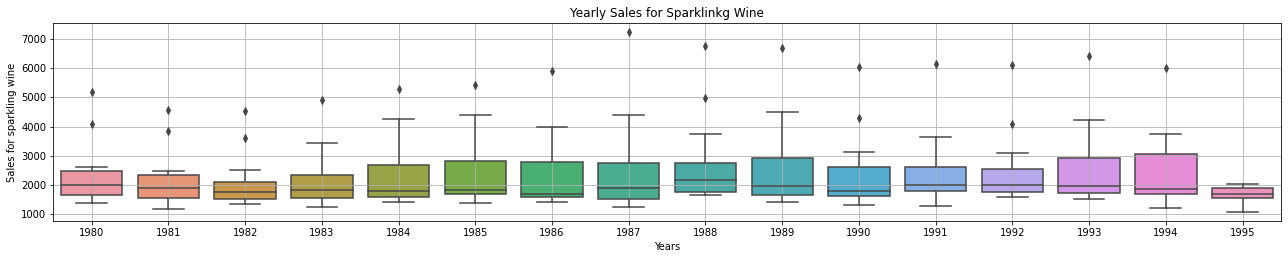

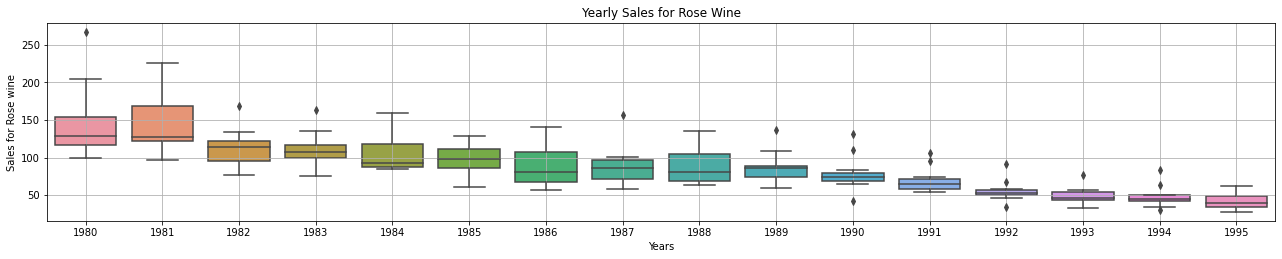

In [19]:
#fig, ax = plt.subplots(1,2,figsize=(22,8))

#plt.subplots(2,2,figsize=(15,12))

fig=plt.figure(figsize=(22,8))
ax=fig.add_subplot(2,1,1)
sns.boxplot(Sparkling.index.year, Sparkling, ax=ax,whis=1.5)
plt.grid();
ax.set_title('Yearly Sales for Sparklinkg Wine')
plt.xlabel('Years');
plt.ylabel('Sales for sparkling wine');


fig=plt.figure(figsize=(22,8))
axes=fig.add_subplot(2,1,2)
sns.boxplot(Rose.index.year, Rose, ax=axes,whis=1.5)
axes.set_title('Yearly Sales for Rose Wine')
plt.grid();
plt.xlabel('Years');
plt.ylabel('Sales for Rose wine');


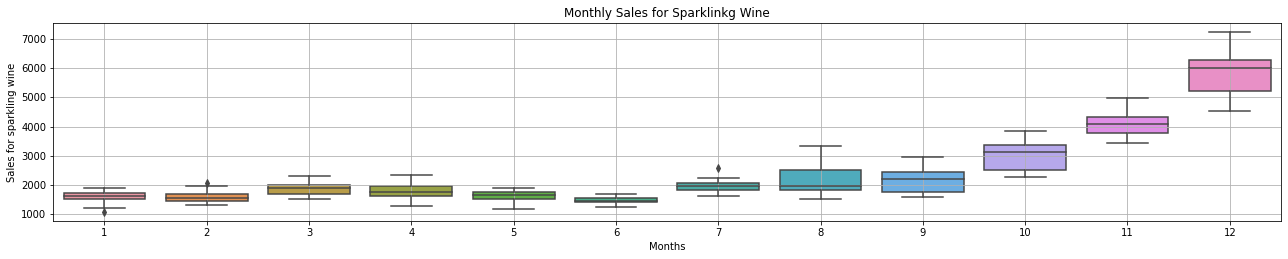

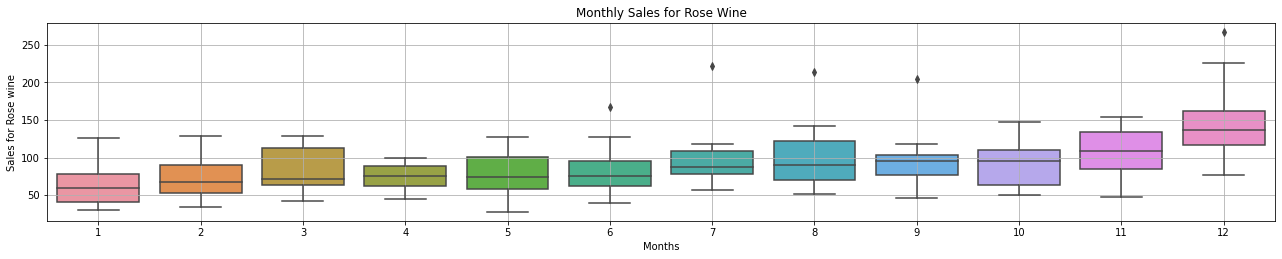

In [20]:

fig=plt.figure(figsize=(22,8))
ax=fig.add_subplot(2,1,1)
sns.boxplot(Sparkling.index.month, Sparkling, ax=ax,whis=1.5)
plt.grid();
ax.set_title('Monthly Sales for Sparklinkg Wine')
plt.xlabel('Months');
plt.ylabel('Sales for sparkling wine');


fig=plt.figure(figsize=(22,8))
ax=fig.add_subplot(2,1,2)
sns.boxplot(Rose.index.month, Rose, ax=ax,whis=1.5)
ax.set_title('Monthly Sales for Rose Wine')
plt.grid();
plt.xlabel('Months');
plt.ylabel('Sales for Rose wine');

In [21]:
yearly_sales_across_months = pd.pivot_table(Sparkling_df, values = 'Sparkling', columns = Sparkling.index.month, 
                                        index = Sparkling.index.year)

yearly_sales_across_months

YearMonth       1       2       3       4       5       6       7       8  \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0 NaN       

YearMonth       9      10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995      NaN     NaN     NaN     NaN

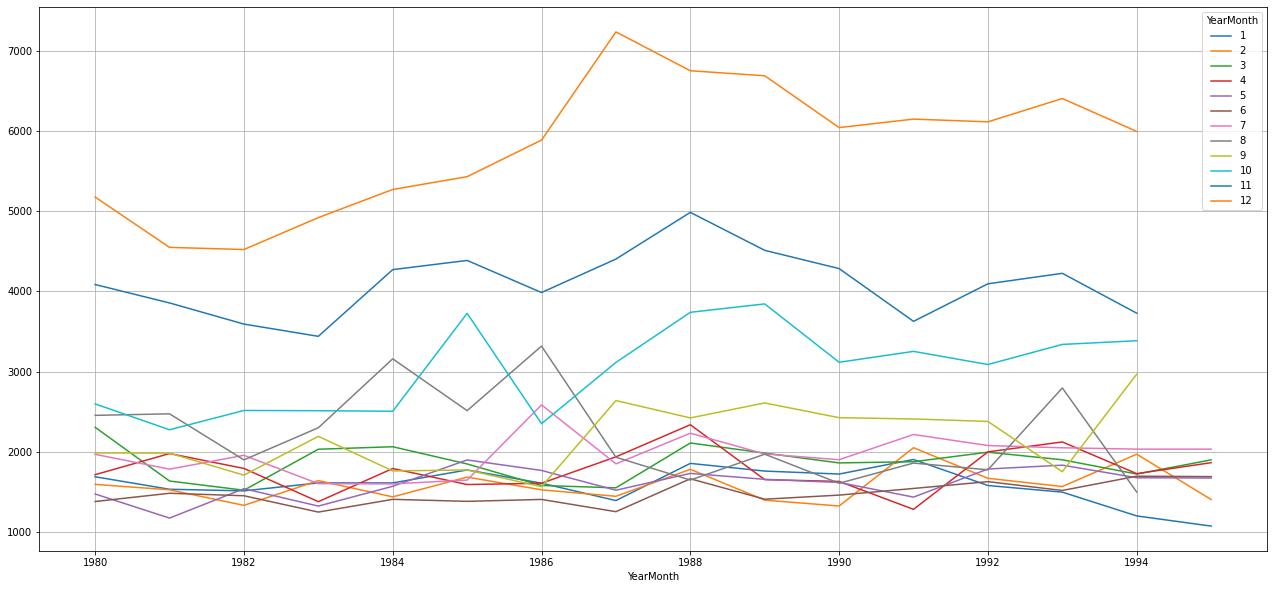

In [22]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

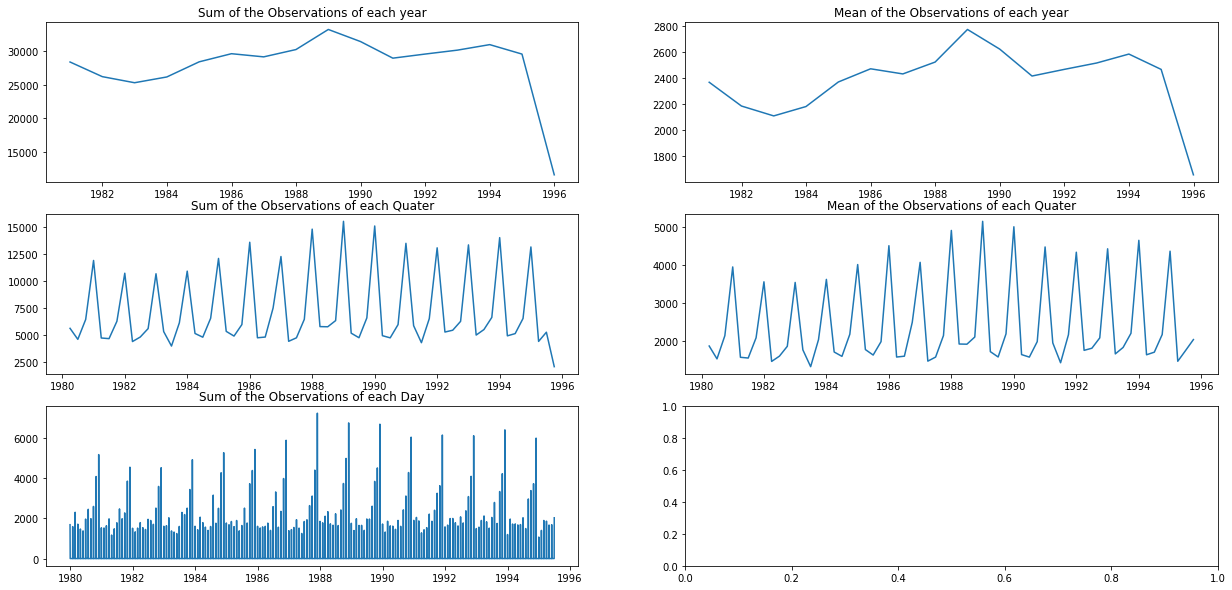

In [23]:
           
fig, axs = plt.subplots(3, 2,figsize=(21,10))
axs[0, 0].plot(Sparkling.resample('A').sum())
axs[0, 0].set_title('Sum of the Observations of each year');

axs[0, 1].plot(Sparkling.resample('A').mean())
axs[0, 1].set_title('Mean of the Observations of each year');


axs[1, 0].plot(Sparkling.resample('Q').sum())
axs[1, 0].set_title('Sum of the Observations of each Quater');

axs[1, 1].plot(Sparkling.resample('Q').mean())
axs[1, 1].set_title('Mean of the Observations of each Quater');


axs[2, 0].plot(Sparkling.resample('D').sum())
axs[2, 0].set_title('Sum of the Observations of each Day');




In [24]:
Rose_df=pd.DataFrame(Rose)
yearly_sales_across_months_rose = pd.pivot_table(Rose_df, values = 'Rose', columns = Rose.index.month, 
                                        index = Rose.index.year)

yearly_sales_across_months_rose

YearMonth      1      2      3     4      5      6      7      8      9  \
YearMonth                                                                 
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1982       89.0   77.0   82.0   97.0  127.0  121.0  117.0  117.0  106.0   
1983       75.0   108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1984       88.0   85.0   112.0  87.0  91.0   87.0   87.0   142.0  95.0    
1985       61.0   82.0   124.0  93.0  108.0  75.0   87.0   103.0  90.0    
1986       57.0   65.0   67.0   71.0  76.0   67.0   110.0  118.0  99.0    
1987       58.0   65.0   70.0   86.0  93.0   74.0   87.0   73.0   101.0   
1988       63.0   115.0  70.0   66.0  67.0   83.0   79.0   77.0   102.0   
1989       71.0   60.0   89.0   74.0  73.0   91.0   86.0   74.0   87.0    
1990       43.0   69.0   73.0   77.0  69.0   76.0   78.0   70.0   83.0    
1991       54.0   55.0   66.0   65.0  60.0   65.0   96.0   55.0   71.0    
1992       34.0   47.0   56.0   53.0  53.0   55.0   67.0   52.0   46.0    
1993       33.0   40.0   46.0   45.0  41.0   55.0   57.0   54.0   46.0    
1994       30.0   35.0   42.0   48.0  44.0   45.0  NaN    NaN     46.0    
1995       30.0   39.0   45.0   52.0  28.0   40.0   62.0  NaN    NaN      

YearMonth     10     11     12  
YearMonth                       
1980       147.0  150.0  267.0  
1981       141.0  154.0  226.0  
1982       112.0  134.0  169.0  
1983       95.0   135.0  164.0  
1984       108.0  139.0  159.0  
1985       108.0  123.0  129.0  
1986       85.0   107.0  141.0  
1987       100.0  96.0   157.0  
1988       116.0  100.0  135.0  
1989       87.0   109.0  137.0  
1990       65.0   110.0  132.0  
1991       63.0   74.0   106.0  
1992       51.0   58.0   91.0   
1993       52.0   48.0   77.0   
1994       51.0   63.0   84.0   
1995      NaN    NaN    NaN

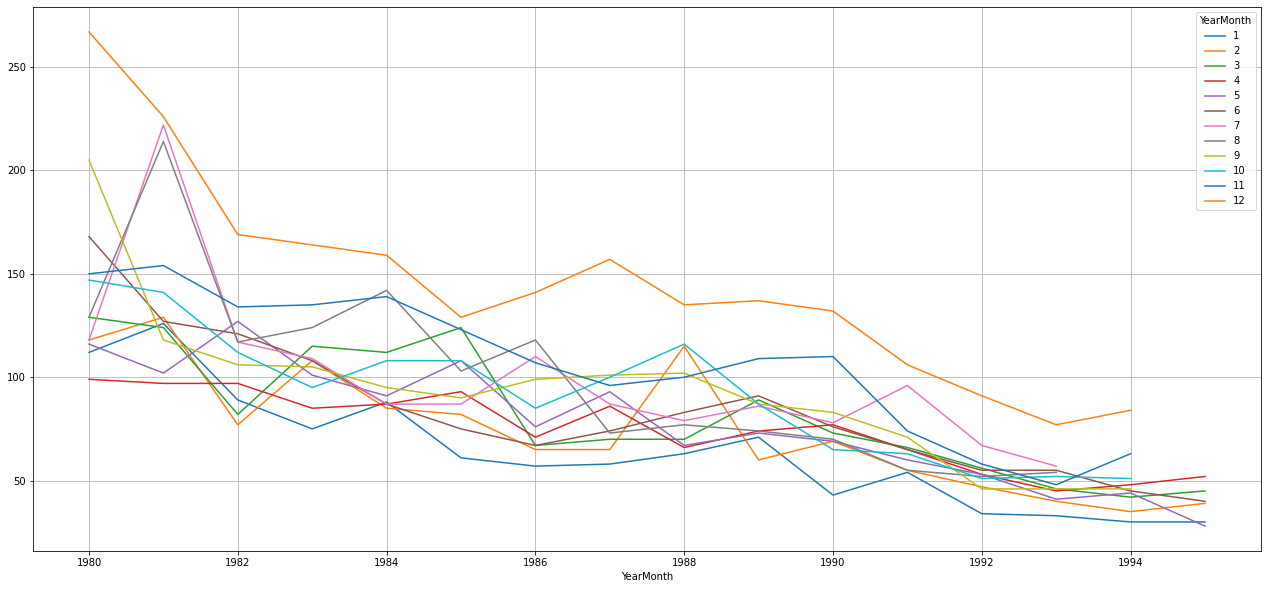

In [25]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months_rose.plot(ax=ax)
plt.grid();

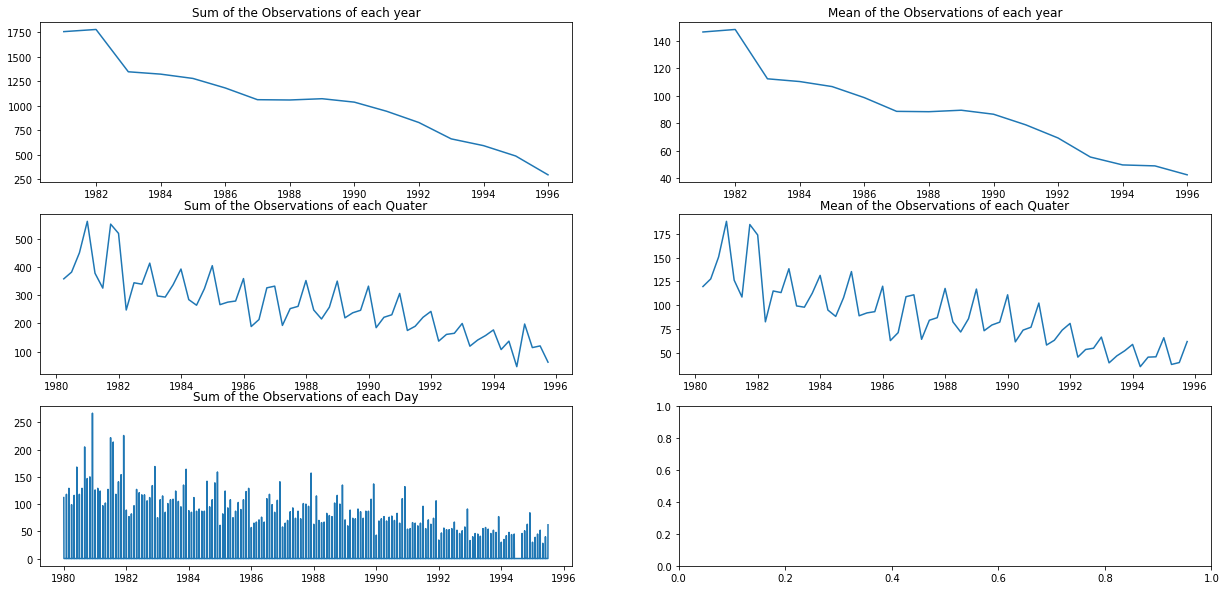

In [26]:
           
fig, axs = plt.subplots(3, 2,figsize=(21,10))
axs[0, 0].plot(Rose.resample('A').sum())
axs[0, 0].set_title('Sum of the Observations of each year');

axs[0, 1].plot(Rose.resample('A').mean())
axs[0, 1].set_title('Mean of the Observations of each year');


axs[1, 0].plot(Rose.resample('Q').sum())
axs[1, 0].set_title('Sum of the Observations of each Quater');

axs[1, 1].plot(Rose.resample('Q').mean())
axs[1, 1].set_title('Mean of the Observations of each Quater');


axs[2, 0].plot(Rose.resample('D').sum())
axs[2, 0].set_title('Sum of the Observations of each Day');



<h2> Observations:</h2>
Sales for Sparkling wine are increasing in numbers till year 1988 and decreasing post 1988 where sales is incresing from July to December and is lower from Januray to July.

Sales for Rose Wine are decreasing in numbers,where sales is incresing from July to December and is lower from Januray to July.

Sales of Rose Wine seems to be impacted by sales of Sparkling wine.

## Decomposing the Time Series

### 1. Sparkling Wine DataSet Decompositions

Multiplicative Decomposition with Moving Avergae


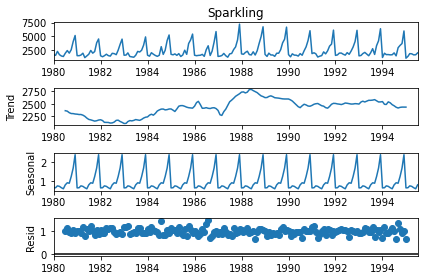

In [27]:
print(color.BOLD + color.DARKCYAN+'Multiplicative Decomposition with Moving Avergae')
MV_dec_Sparkling_Mul = seasonal_decompose(Sparkling, model='multiplicative')
MV_dec_Sparkling_Mul.plot();

#### Also plotting Additive and STL decomposition of time series

Additive Decomposition with Moving Avergae


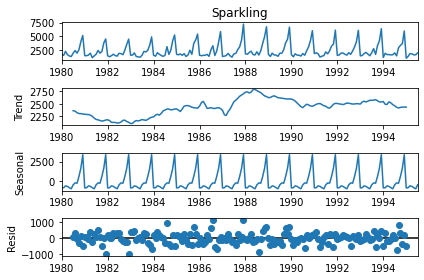

In [28]:
print(color.BOLD + color.DARKCYAN+'Additive Decomposition with Moving Avergae')
MV_dec_Sparkling_Add = seasonal_decompose(Sparkling, model='additive')
MV_dec_Sparkling_Add.plot();

Seasonal and Trend decomposition by Loess


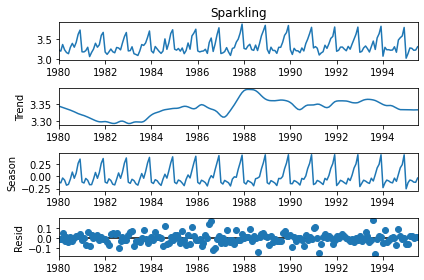

In [29]:
print(color.BOLD + color.DARKCYAN+'Seasonal and Trend decomposition by Loess')

STL_dec_Sparkling = STL(np.log10(Sparkling), seasonal=13).fit() 
STL_dec_Sparkling.plot();

In [30]:
print(color.BOLD + color.BLUE+'Sparkling DataSet: Seasonal Indices : Multiplicative Decomposition')

Sparkling DataSet: Seasonal Indices : Multiplicative Decomposition


In [31]:
Seasonal_Ind = pd.DataFrame({'Jan':round(MV_dec_Sparkling_Mul.seasonal.head(12),2).values[0], 
 'Feb':round(MV_dec_Sparkling_Mul.seasonal.head(12),2).values[1],
 'Mar':round(MV_dec_Sparkling_Mul.seasonal.head(12),2).values[2],
 'Apr':round(MV_dec_Sparkling_Mul.seasonal.head(12),2).values[3],
 'May':round(MV_dec_Sparkling_Mul.seasonal.head(12),2).values[4], 
 'Jun':round(MV_dec_Sparkling_Mul.seasonal.head(12),2).values[5], 
 'Jul':round(MV_dec_Sparkling_Mul.seasonal.head(12),2).values[6], 
 'Aug':round(MV_dec_Sparkling_Mul.seasonal.head(12),2).values[7], 
 'Sep':round(MV_dec_Sparkling_Mul.seasonal.head(12),2).values[8], 
 'Oct':round(MV_dec_Sparkling_Mul.seasonal.head(12),2).values[9], 
 'Nov':round(MV_dec_Sparkling_Mul.seasonal.head(12),2).values[10],
 'Dec':round(MV_dec_Sparkling_Mul.seasonal.head(12),2).values[11]}, index=range(1,2)) 
Seasonal_Ind

Jan   Feb   Mar   Apr   May  Jun   Jul   Aug   Sep   Oct   Nov   Dec
1  0.65  0.66  0.76  0.73  0.66  0.6  0.81  0.92  0.89  1.24  1.69  2.38

### 2. Rose Wine DataSet Decompositions

In [32]:
print(color.BOLD + color.DARKCYAN+'Rose Wine Dataset has null values:')
Rose[Rose.isnull()]


Rose Wine Dataset has null values:


YearMonth
1994-07-01   NaN
1994-08-01   NaN
Name: Rose, dtype: float64

In [33]:
Rose=Rose.interpolate(method='pad')

In [34]:
print(color.BOLD + color.DARKCYAN+'Null values are imputed and the data set is now ready for decomposition')
Rose_df=pd.DataFrame(Rose)
Rose[Rose.isnull()]
print('Missing values:',Rose.isnull().sum())

Null values are imputed and the data set is now ready for decomposition
Missing values: 0


Multiplicative Decomposition with Moving Avergae


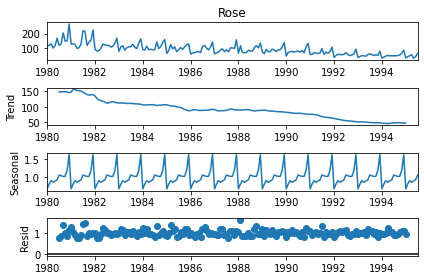

In [35]:
print(color.BOLD + color.DARKCYAN+'Multiplicative Decomposition with Moving Avergae')
MV_dec_Rose_Mul = seasonal_decompose(Rose, model='multiplicative')
MV_dec_Rose_Mul.plot();

#### Also plotting Additive and STL decomposition of time series

Additive Decomposition with Moving Avergae


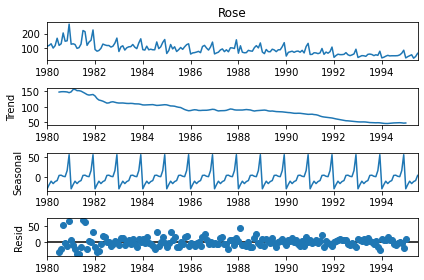

In [36]:
print(color.BOLD + color.DARKCYAN+'Additive Decomposition with Moving Avergae')
MV_dec_Rose_Add = seasonal_decompose(Rose, model='additive')
MV_dec_Rose_Add.plot();


Seasonal and Trend decomposition by Loess


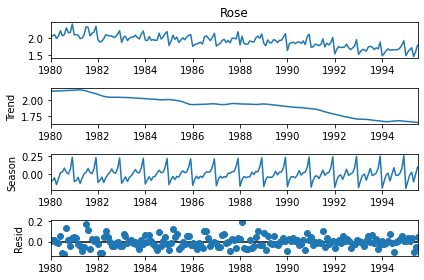

In [37]:
print(color.BOLD + color.DARKCYAN+'Seasonal and Trend decomposition by Loess')

STL_dec_Rose = STL(np.log10(Rose), seasonal=13).fit() 
STL_dec_Rose.plot();

In [38]:
print(color.BOLD + color.BLUE+'Sparkling DataSet: Seasonal Indices : Multiplicative Decomposition')

Sparkling DataSet: Seasonal Indices : Multiplicative Decomposition


In [39]:
Seasonal_Ind = pd.DataFrame({'Jan':round(MV_dec_Rose_Mul.seasonal.head(12),2).values[0], 
 'Feb':round(MV_dec_Rose_Mul.seasonal.head(12),2).values[1],
 'Mar':round(MV_dec_Rose_Mul.seasonal.head(12),2).values[2],
 'Apr':round(MV_dec_Rose_Mul.seasonal.head(12),2).values[3],
 'May':round(MV_dec_Rose_Mul.seasonal.head(12),2).values[4], 
 'Jun':round(MV_dec_Rose_Mul.seasonal.head(12),2).values[5], 
 'Jul':round(MV_dec_Rose_Mul.seasonal.head(12),2).values[6], 
 'Aug':round(MV_dec_Rose_Mul.seasonal.head(12),2).values[7], 
 'Sep':round(MV_dec_Rose_Mul.seasonal.head(12),2).values[8], 
 'Oct':round(MV_dec_Rose_Mul.seasonal.head(12),2).values[9], 
 'Nov':round(MV_dec_Rose_Mul.seasonal.head(12),2).values[10],
 'Dec':round(MV_dec_Rose_Mul.seasonal.head(12),2).values[11]}, index=range(1,2)) 
Seasonal_Ind

Jan   Feb  Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1  0.67  0.81  0.9  0.85  0.89  0.92  1.06  1.04  1.02  1.02  1.19  1.63

***
<h2>3. Split the data into training and test. The test data should start in 1991.</h2>
<br>
<h3>Solution:</h3>



<h3> Splitting data into train and test :</h3>

In [40]:
Sparkling_train= pd.DataFrame(Sparkling[Sparkling.index<'1991'])
Sparkling_test= pd.DataFrame(Sparkling[Sparkling.index>='1991'])

Rose_train= pd.DataFrame(Rose[Rose.index<'1991']) 
Rose_test= pd.DataFrame(Rose[Rose.index>='1991'])

In [41]:
print(color.BOLD + color.BLUE+'First few rows of Training Data')
display(Sparkling_train.head())
print(color.BOLD + color.BLUE+'Last few rows of Training Data')
display(Sparkling_train.tail())
print(color.BOLD + color.BLUE+'First few rows of Test Data')
display(Sparkling_test.head())
print(color.BOLD + color.BLUE+'Last few rows of Test Data')
display(Sparkling_test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01  1686     
1980-02-01  1591     
1980-03-01  2304     
1980-04-01  1712     
1980-05-01  1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01  1605     
1990-09-01  2424     
1990-10-01  3116     
1990-11-01  4286     
1990-12-01  6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01  1902     
1991-02-01  2049     
1991-03-01  1874     
1991-04-01  1279     
1991-05-01  1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01  1897     
1995-04-01  1862     
1995-05-01  1670     
1995-06-01  1688     
1995-07-01  2031

In [42]:
print(color.BOLD + color.BLUE+'First few rows of Training Data')
display(Rose_train.head())
print(color.BOLD + color.BLUE+'Last few rows of Training Data')
display(Rose_train.tail())
print(color.BOLD + color.BLUE+'First few rows of Test Data')
display(Rose_test.head())
print(color.BOLD + color.BLUE+'Last few rows of Test Data')
display(Rose_test.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01  99.0 
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01  70.0 
1990-09-01  83.0 
1990-10-01  65.0 
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

Plotting Train and Test DataSets


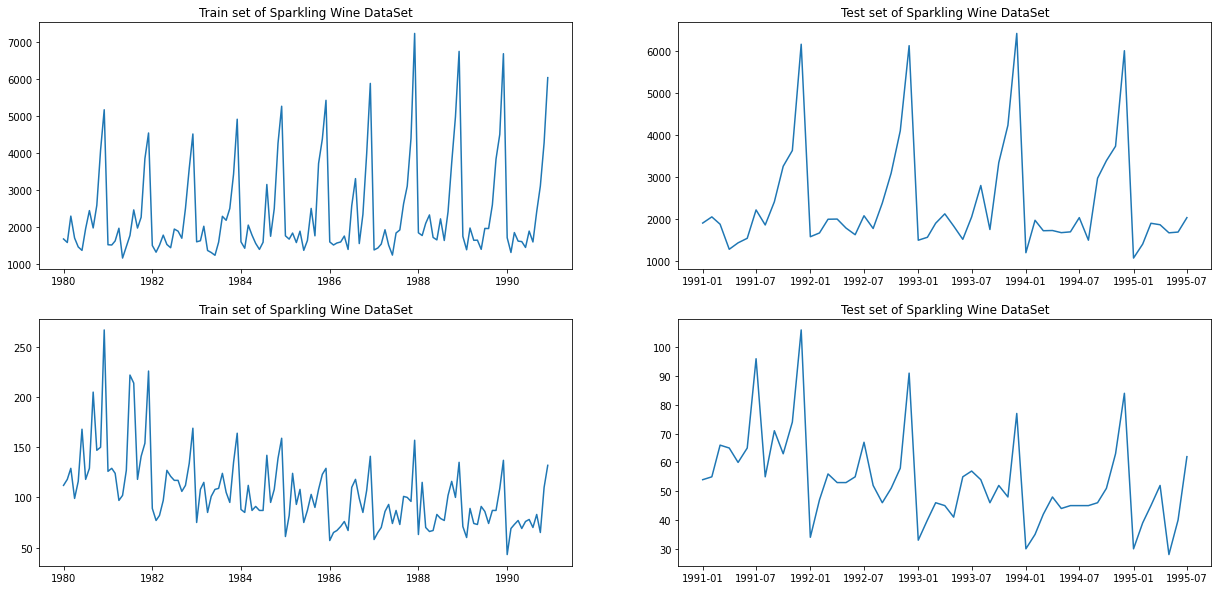

In [43]:
print(color.BOLD + color.DARKCYAN+'Plotting Train and Test DataSets')
fig, axs = plt.subplots(2, 2,figsize=(21,10))

axs[0, 0].plot(Sparkling_train)
axs[0, 0].set_title('Train set of Sparkling Wine DataSet');


axs[0, 1].plot(Sparkling_test)
axs[0, 1].set_title('Test set of Sparkling Wine DataSet');


axs[1, 0].plot(Rose_train)
axs[1, 0].set_title('Train set of Sparkling Wine DataSet');


axs[1, 1].plot(Rose_test)
axs[1, 1].set_title('Test set of Sparkling Wine DataSet');


In [44]:
print(color.BOLD+color.DARKCYAN+"Train Set for Sparkling and Rose data set ranges from year 1980 to 1990.")
print(color.BOLD+color.DARKCYAN+"Test Set for Sparkling and Rose data set ranges from year 1991 to 1995.")

Train Set for Sparkling and Rose data set ranges from year 1980 to 1990.
Test Set for Sparkling and Rose data set ranges from year 1991 to 1995.


In [45]:
print(color.BOLD+color.DARKCYAN+"Sparkling train set contains", Sparkling_train.shape[0],"records", "while Sparkling test set contains",Sparkling_test.shape[0],"records.")

print(color.BOLD+color.DARKCYAN+"Rose train set contains", Rose_train.shape[0],"records", "while Rose test set contains",
Rose_test.shape[0],"records.")

Sparkling train set contains 132 records while Sparkling test set contains 55 records.
Rose train set contains 132 records while Rose test set contains 55 records.


***
<h2>4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.</h2>
<br>
<h3>Solution:</h3>

<h2> Model Building- Sparkling Wine </h2>

<h3> Model 1: Linear Regression :</h3>

In [46]:
Sparkling_train_time = [i+1 for i in range(len(Sparkling_train))]
Sparkling_test_time = [i+133 for i in range(len(Sparkling_test))]
print(color.BOLD + color.BLUE+'Sparkling Wine Training Time instance','\n',Sparkling_train_time)
print("\n")
print(color.BOLD + color.BLUE+'Sparkling Wine Test Time instance','\n',Sparkling_test_time)

Sparkling Wine Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Sparkling Wine Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [47]:
Sparkling_LinearRegression_train = Sparkling_train.copy()
Sparkling_LinearRegression_test = Sparkling_test.copy()

In [48]:
print(color.BOLD + color.DARKCYAN+'Train and Test Data Set')
Sparkling_LinearRegression_train['time'] = Sparkling_train_time
Sparkling_LinearRegression_test['time'] = Sparkling_test_time

print(color.BOLD + color.BLUE+'First few rows of Training Data')
display(Sparkling_LinearRegression_train.head())
print(color.BOLD + color.BLUE+'Last few rows of Training Data')
display(Sparkling_LinearRegression_train.tail())
print(color.BOLD + color.BLUE+'First few rows of Test Data')
display(Sparkling_LinearRegression_test.head())
print(color.BOLD + color.BLUE+'Last few rows of Test Data')
display(Sparkling_LinearRegression_test.tail())

Train and Test Data Set
First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01  1686       1   
1980-02-01  1591       2   
1980-03-01  2304       3   
1980-04-01  1712       4   
1980-05-01  1471       5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01  1605       128 
1990-09-01  2424       129 
1990-10-01  3116       130 
1990-11-01  4286       131 
1990-12-01  6047       132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01  1902       133 
1991-02-01  2049       134 
1991-03-01  1874       135 
1991-04-01  1279       136 
1991-05-01  1432       137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01  1897       183 
1995-04-01  1862       184 
1995-05-01  1670       185 
1995-06-01  1688       186 
1995-07-01  2031       187

In [49]:
#Building model 
print(color.BOLD + color.DARKCYAN+'Building and Fitting the Model')

from sklearn.linear_model import LinearRegression
lr_Sparkling = LinearRegression()
lr_Sparkling.fit(Sparkling_LinearRegression_train[['time']],Sparkling_LinearRegression_train['Sparkling'])

Building and Fitting the Model


LinearRegression()

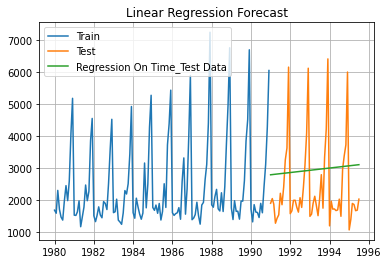

In [50]:
Sparkling_train_predictions_model1         = lr_Sparkling.predict(Sparkling_LinearRegression_train[['time']])
Sparkling_LinearRegression_train['RegOnTime'] = Sparkling_train_predictions_model1

Sparkling_test_predictions_model1         = lr_Sparkling.predict(Sparkling_LinearRegression_test[['time']])
Sparkling_LinearRegression_test['RegOnTime'] = Sparkling_test_predictions_model1

plt.plot(Sparkling_train['Sparkling'], label='Train')
plt.plot(Sparkling_test['Sparkling'], label='Test')
plt.plot(Sparkling_LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')

plt.title("Linear Regression Forecast")
plt.grid();

#### Model Evaluation


In [51]:
from sklearn import metrics
Sparkling_rmse_model1_test = metrics.mean_squared_error(Sparkling_test['Sparkling'],Sparkling_test_predictions_model1,squared=False)
print(color.BOLD+color.BLUE+"For Linear Regression forecast on the Test Data,  RMSE is %3.3f " %(Sparkling_rmse_model1_test))

For Linear Regression forecast on the Test Data,  RMSE is 1389.135 


In [52]:
Sparkling_resultsDf = pd.DataFrame({'Test RMSE': [Sparkling_rmse_model1_test]},index=['Linear Regression'])
Sparkling_resultsDf

Test RMSE
Linear Regression  1389.135175

<h3> Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$ </h3>

In [53]:
Sparkling_NaiveModel_train = Sparkling_train.copy()
Sparkling_NaiveModel_test = Sparkling_test.copy()

In [54]:
Sparkling_NaiveModel_test['naive'] = np.asarray(Sparkling_train['Sparkling'])[len(np.asarray(Sparkling_train['Sparkling']))-1]

In [55]:
print(color.BOLD + color.DARKCYAN+'Train and Test Data Set')

print(color.BOLD+color.BLUE+'First few rows of Training Data')
display(Sparkling_NaiveModel_train.head())
print(color.BOLD+color.BLUE+'Last few rows of Training Data')
display(Sparkling_NaiveModel_train.tail())
print(color.BOLD+color.BLUE+'First few rows of Test Data')
display(Sparkling_NaiveModel_test.head())
print(color.BOLD+color.BLUE+'Last few rows of Test Data')
display(Sparkling_NaiveModel_test.tail())

Train and Test Data Set
First few rows of Training Data


Sparkling
YearMonth            
1980-01-01  1686     
1980-02-01  1591     
1980-03-01  2304     
1980-04-01  1712     
1980-05-01  1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01  1605     
1990-09-01  2424     
1990-10-01  3116     
1990-11-01  4286     
1990-12-01  6047

First few rows of Test Data


Sparkling  naive
YearMonth                   
1991-01-01  1902       6047 
1991-02-01  2049       6047 
1991-03-01  1874       6047 
1991-04-01  1279       6047 
1991-05-01  1432       6047

Last few rows of Test Data


Sparkling  naive
YearMonth                   
1995-03-01  1897       6047 
1995-04-01  1862       6047 
1995-05-01  1670       6047 
1995-06-01  1688       6047 
1995-07-01  2031       6047

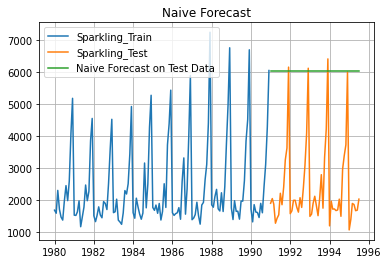

In [56]:
plt.plot(Sparkling_NaiveModel_train['Sparkling'], label='Sparkling_Train')
plt.plot(Sparkling_NaiveModel_test['Sparkling'], label='Sparkling_Test')

plt.plot(Sparkling_NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [57]:
Sparkling_rmse_model2_test = metrics.mean_squared_error(Sparkling_test['Sparkling'],Sparkling_NaiveModel_test['naive'],squared=False)
print(color.BOLD+color.BLUE+"For Naive Approach forecast on the Test Data,  RMSE is %3.3f" %(Sparkling_rmse_model2_test))

For Naive Approach forecast on the Test Data,  RMSE is 3864.279


In [58]:
Sparkling_resultsDf_2 = pd.DataFrame({'Test RMSE': [Sparkling_rmse_model2_test]},index=['NaiveModel'])

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_resultsDf_2])
Sparkling_resultsDf

Test RMSE
Linear Regression  1389.135175
NaiveModel         3864.279352

<h3> Method 3: Simple Average </h3>

In [59]:
Sparkling_SimpleAverage_train = Sparkling_train.copy()
Sparkling_SimpleAverage_test = Sparkling_test.copy()

In [60]:
Sparkling_SimpleAverage_test['mean_forecast'] = Sparkling_train['Sparkling'].mean()

In [61]:
print(color.BOLD + color.DARKCYAN+'Train and Test Data Set')

print(color.BOLD+color.BLUE+'First few rows of Training Data')
display(Sparkling_SimpleAverage_train.head())
print(color.BOLD+color.BLUE+'Last few rows of Training Data')
display(Sparkling_SimpleAverage_train.tail())
print(color.BOLD+color.BLUE+'First few rows of Test Data')
display(Sparkling_SimpleAverage_test.head())
print(color.BOLD+color.BLUE+'Last few rows of Test Data')
display(Sparkling_SimpleAverage_test.tail())

Train and Test Data Set
First few rows of Training Data


Sparkling
YearMonth            
1980-01-01  1686     
1980-02-01  1591     
1980-03-01  2304     
1980-04-01  1712     
1980-05-01  1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01  1605     
1990-09-01  2424     
1990-10-01  3116     
1990-11-01  4286     
1990-12-01  6047

First few rows of Test Data


Sparkling  mean_forecast
YearMonth                           
1991-01-01  1902       2403.780303  
1991-02-01  2049       2403.780303  
1991-03-01  1874       2403.780303  
1991-04-01  1279       2403.780303  
1991-05-01  1432       2403.780303

Last few rows of Test Data


Sparkling  mean_forecast
YearMonth                           
1995-03-01  1897       2403.780303  
1995-04-01  1862       2403.780303  
1995-05-01  1670       2403.780303  
1995-06-01  1688       2403.780303  
1995-07-01  2031       2403.780303

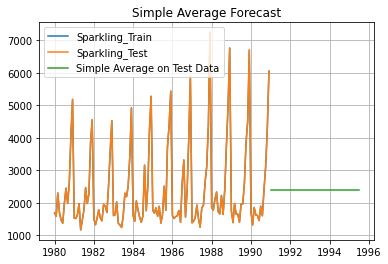

In [62]:
plt.plot(Sparkling_SimpleAverage_train['Sparkling'], label='Sparkling_Train')
plt.plot(Sparkling_SimpleAverage_train['Sparkling'], label='Sparkling_Test')

plt.plot(Sparkling_SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [63]:
Sparkling_rmse_model3_test = metrics.mean_squared_error(Sparkling_test['Sparkling'],Sparkling_SimpleAverage_test['mean_forecast'],squared=False)
print(color.BOLD+color.BLUE+"For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(Sparkling_rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [64]:
Sparkling_resultsDf_3 = pd.DataFrame({'Test RMSE': [Sparkling_rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_resultsDf_3])
Sparkling_resultsDf

Test RMSE
Linear Regression   1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

<h3> Method 4: Moving Average(MA) -Mean </h3>

In [65]:
Sparkling_MovingAverage = pd.DataFrame(Sparkling.copy())

In [66]:
print(color.BOLD+color.DARKCYAN+'Trailing Moving Averages')

Sparkling_MovingAverage['Trailing_2'] = Sparkling_MovingAverage['Sparkling'].rolling(2).mean()
Sparkling_MovingAverage['Trailing_4'] = Sparkling_MovingAverage['Sparkling'].rolling(4).mean()
Sparkling_MovingAverage['Trailing_6'] = Sparkling_MovingAverage['Sparkling'].rolling(6).mean()
Sparkling_MovingAverage['Trailing_9'] = Sparkling_MovingAverage['Sparkling'].rolling(9).mean()

Sparkling_MovingAverage.head()

Trailing Moving Averages


Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01  1686      NaN         NaN         NaN         NaN        
1980-02-01  1591       1638.5     NaN         NaN         NaN        
1980-03-01  2304       1947.5     NaN         NaN         NaN        
1980-04-01  1712       2008.0      1823.25    NaN         NaN        
1980-05-01  1471       1591.5      1769.50    NaN         NaN

In [67]:
#Creating train and test set 
Sparkling_trailing_MovingAverage_train=Sparkling_MovingAverage[Sparkling_MovingAverage.index<'1991'] 
Sparkling_trailing_MovingAverage_test=Sparkling_MovingAverage[Sparkling_MovingAverage.index>'1991']

In [68]:
print(color.BOLD + color.DARKCYAN+'Train and Test Data Set')

print(color.BOLD+color.BLUE+'First few rows of Training Data')
display(Sparkling_trailing_MovingAverage_train.head())
print(color.BOLD+color.BLUE+'Last few rows of Training Data')
display(Sparkling_trailing_MovingAverage_train.tail())
print(color.BOLD+color.BLUE+'First few rows of Test Data')
display(Sparkling_MovingAverage.head())
print(color.BOLD+color.BLUE+'Last few rows of Test Data')
display(Sparkling_MovingAverage.tail())

Train and Test Data Set
First few rows of Training Data


Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01  1686      NaN         NaN         NaN         NaN        
1980-02-01  1591       1638.5     NaN         NaN         NaN        
1980-03-01  2304       1947.5     NaN         NaN         NaN        
1980-04-01  1712       2008.0      1823.25    NaN         NaN        
1980-05-01  1471       1591.5      1769.50    NaN         NaN

Last few rows of Training Data


Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1990-08-01  1605       1752.0      1644.00     1677.166667  2199.777778
1990-09-01  2424       2014.5      1846.25     1771.333333  1725.333333
1990-10-01  3116       2770.0      2261.00     2019.333333  1880.444444
1990-11-01  4286       3701.0      2857.75     2464.500000  2209.888889
1990-12-01  6047       5166.5      3968.25     3229.500000  2675.222222

First few rows of Test Data


Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01  1686      NaN         NaN         NaN         NaN        
1980-02-01  1591       1638.5     NaN         NaN         NaN        
1980-03-01  2304       1947.5     NaN         NaN         NaN        
1980-04-01  1712       2008.0      1823.25    NaN         NaN        
1980-05-01  1471       1591.5      1769.50    NaN         NaN

Last few rows of Test Data


Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1995-03-01  1897       1649.5      2592.00     2913.666667  2664.000000
1995-04-01  1862       1879.5      1557.75     2659.833333  2645.222222
1995-05-01  1670       1766.0      1707.75     2316.666667  2664.666667
1995-06-01  1688       1679.0      1779.25     1598.166667  2522.444444
1995-07-01  2031       1859.5      1812.75     1758.333333  2372.000000

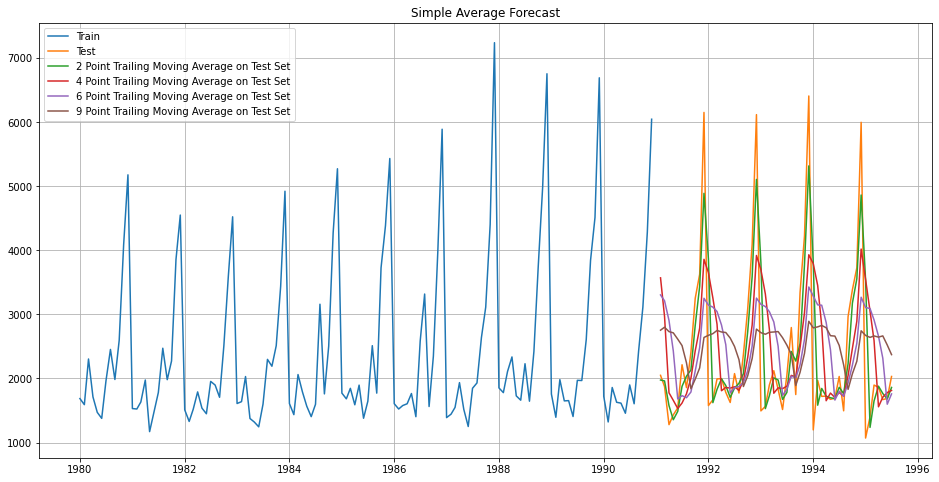

In [69]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Sparkling_trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(Sparkling_trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(Sparkling_trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(Sparkling_trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(Sparkling_trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(Sparkling_trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')

plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [70]:
## Test Data - RMSE  --> 2 point Trailing MA

Sparkling_rmse_model4_test_2 = metrics.mean_squared_error(Sparkling_trailing_MovingAverage_test['Sparkling'],Sparkling_trailing_MovingAverage_test['Trailing_2'],squared=False)
print(color.BOLD+color.BLUE+"For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(Sparkling_rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

Sparkling_rmse_model4_test_4 = metrics.mean_squared_error(Sparkling_trailing_MovingAverage_test['Sparkling'],Sparkling_trailing_MovingAverage_test['Trailing_4'],squared=False)
print(color.BOLD+color.BLUE+"For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(Sparkling_rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

Sparkling_rmse_model4_test_6 = metrics.mean_squared_error(Sparkling_trailing_MovingAverage_test['Sparkling'],Sparkling_trailing_MovingAverage_test['Trailing_6'],squared=False)
print(color.BOLD+color.BLUE+"For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(Sparkling_rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

Sparkling_rmse_model4_test_9 = metrics.mean_squared_error(Sparkling_trailing_MovingAverage_test['Sparkling'],Sparkling_trailing_MovingAverage_test['Trailing_9'],squared=False)
print(color.BOLD+color.BLUE+"For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(Sparkling_rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 770.929
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 1137.137
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 1283.097
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 1354.278


In [71]:
Sparkling_resultsDf_4 = pd.DataFrame({'Test RMSE': [Sparkling_rmse_model4_test_2,Sparkling_rmse_model4_test_4
                                          ,Sparkling_rmse_model4_test_6,Sparkling_rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_resultsDf_4])
Sparkling_resultsDf

Test RMSE
Linear Regression            1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage  770.928742 
4pointTrailingMovingAverage  1137.137053
6pointTrailingMovingAverage  1283.096993
9pointTrailingMovingAverage  1354.277938

### Model 5 - Simple Expnential Smoothening

In [72]:
Sparkling_SES_train = Sparkling_train.copy()
Sparkling_SES_test = Sparkling_test.copy()

### Model  for $\alpha$ = 0.2 : Simple Exponential Smoothing

In [73]:
SES1 = SimpleExpSmoothing(Sparkling_SES_train['Sparkling']).fit(smoothing_level=0.2,optimized=False)
SES1.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.2,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 1686.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [74]:
Sparkling_SES_test['predict'] = SES1.forecast(steps=len(Sparkling_SES_test))
Sparkling_SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01  1902       3357.723951
1991-02-01  2049       3357.723951
1991-03-01  1874       3357.723951
1991-04-01  1279       3357.723951
1991-05-01  1432       3357.723951

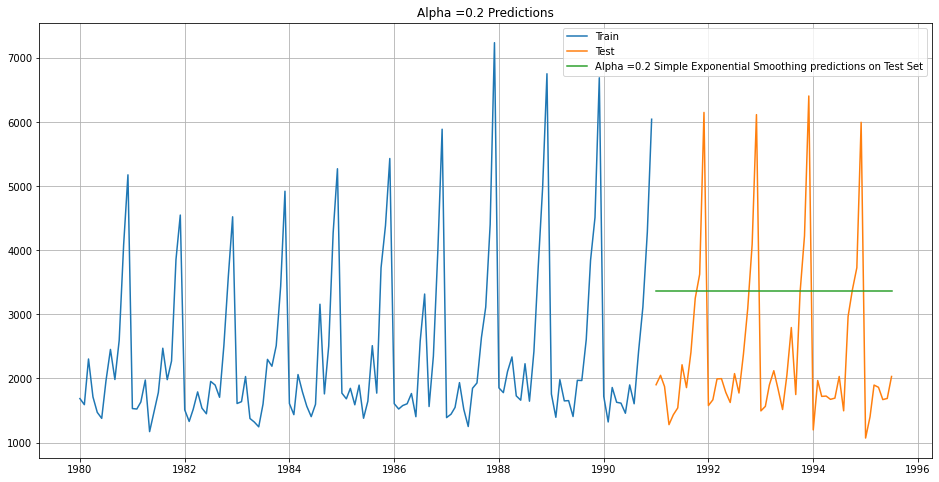

In [75]:
## Plotting on both the Training and Test data
plt.figure(figsize=(16,8))
plt.plot(Sparkling_SES_train['Sparkling'], label='Train')
plt.plot(Sparkling_SES_test['Sparkling'], label='Test')

plt.plot(Sparkling_SES_test['predict'], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()

plt.title('Alpha =0.2 Predictions');


#### Model Evaluation for $\alpha$ = 0.2 : Simple Exponential Smoothing

In [76]:
rmse_Sparkling_test_fit1 = metrics.mean_squared_error(Sparkling_SES_test['Sparkling'],Sparkling_SES_test['predict'],squared=False)
print("For Alpha =0.2 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Sparkling_test_fit1))


For Alpha =0.2 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1595.207


In [77]:
Sparkling_SES_test_1_df = pd.DataFrame({'Test RMSE': [rmse_Sparkling_test_fit1]},index=['Alpha=0.2,SimpleExponentialSmoothing'])

In [78]:

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_SES_test_1_df])
Sparkling_resultsDf

Test RMSE
Linear Regression                     1389.135175
NaiveModel                            3864.279352
SimpleAverageModel                    1275.081804
2pointTrailingMovingAverage           770.928742 
4pointTrailingMovingAverage           1137.137053
6pointTrailingMovingAverage           1283.096993
9pointTrailingMovingAverage           1354.277938
Alpha=0.2,SimpleExponentialSmoothing  1595.206839

### Model  for $\alpha$ = 0.095 : Simple Exponential Smoothing

In [79]:
SES2 = SimpleExpSmoothing(Sparkling_SES_train['Sparkling']).fit(smoothing_level=0.095,optimized=False)
SES2.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.095,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 1686.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [80]:

Sparkling_SES_test['predict'] = SES2.forecast(steps=len(Sparkling_SES_test))
Sparkling_SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01  1902       2895.740675
1991-02-01  2049       2895.740675
1991-03-01  1874       2895.740675
1991-04-01  1279       2895.740675
1991-05-01  1432       2895.740675

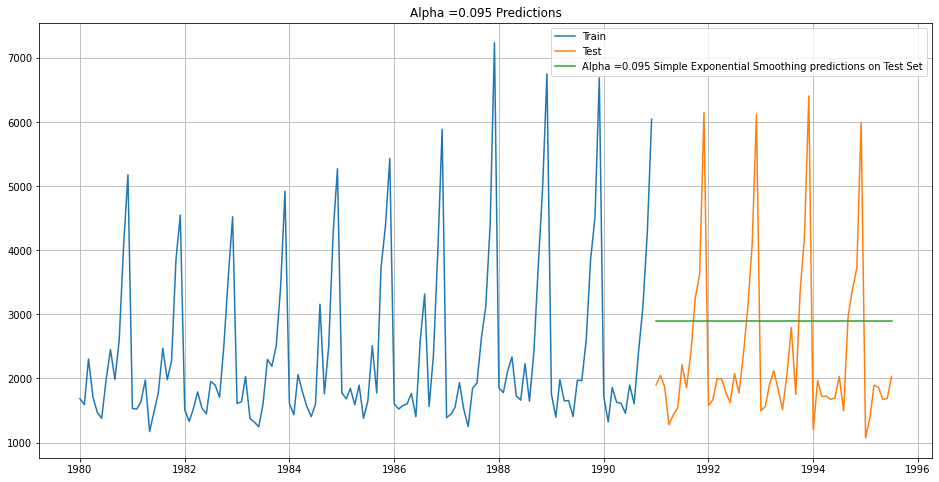

In [81]:
## Plotting on both the Training and Test data
plt.figure(figsize=(16,8))
plt.plot(Sparkling_SES_train['Sparkling'], label='Train')
plt.plot(Sparkling_SES_test['Sparkling'], label='Test')

plt.plot(Sparkling_SES_test['predict'], label='Alpha =0.095 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.095 Predictions');



### Model Evaluation for $\alpha$ = 0.095 : Simple Exponential Smoothing

In [82]:
rmse_Sparkling_test_fit2 = metrics.mean_squared_error(Sparkling_SES_test['Sparkling'],Sparkling_SES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.095 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Sparkling_test_fit2))


 For Alpha =0.095 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1368.364


In [83]:
Sparkling_SES_test_2_df = pd.DataFrame({'Test RMSE': [rmse_Sparkling_test_fit2]},index=['Alpha=0.095,SimpleExponentialSmoothing'])

In [84]:

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_SES_test_2_df])
Sparkling_resultsDf

Test RMSE
Linear Regression                       1389.135175
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage             770.928742 
4pointTrailingMovingAverage             1137.137053
6pointTrailingMovingAverage             1283.096993
9pointTrailingMovingAverage             1354.277938
Alpha=0.2,SimpleExponentialSmoothing    1595.206839
Alpha=0.095,SimpleExponentialSmoothing  1368.363598

### Model  for $\alpha$ = statsmodels to automatically find an optimized α value : Simple Exponential Smoothing


In [85]:
SES3 = SimpleExpSmoothing(Sparkling_SES_train['Sparkling']).fit()
SES3.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [86]:
Sparkling_SES_test['predict']= SES3.forecast(steps=len(Sparkling_SES_test))
Sparkling_SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01  1902       2403.785622
1991-02-01  2049       2403.785622
1991-03-01  1874       2403.785622
1991-04-01  1279       2403.785622
1991-05-01  1432       2403.785622

In [87]:
print(color.BOLD+color.BLUE+"Parameters automatically selected by model:")
SES3.params

Parameters automatically selected by model:


{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

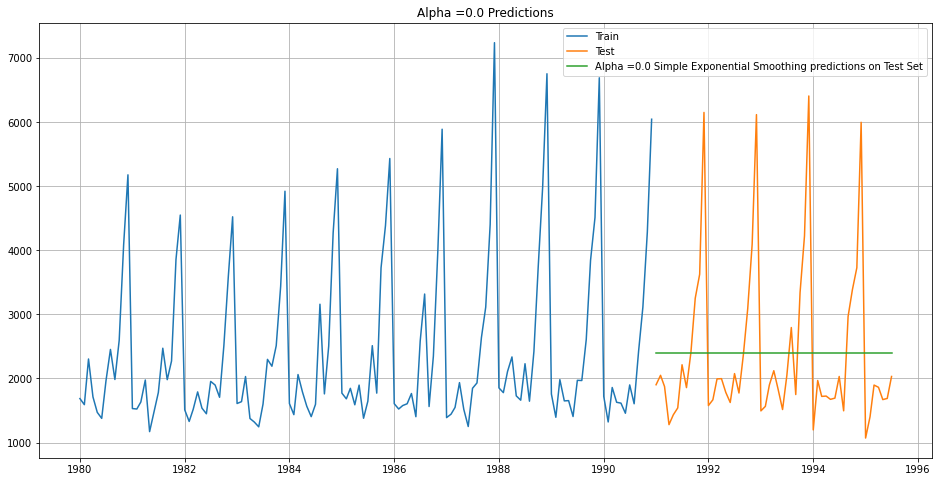

In [88]:
## Plotting on both the Training and Test data
plt.figure(figsize=(16,8))
plt.plot(Sparkling_SES_train['Sparkling'], label='Train')
plt.plot(Sparkling_SES_test['Sparkling'], label='Test')

plt.plot(Sparkling_SES_test['predict'], label='Alpha =0.0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0 Predictions');


### Model Evaluation for $\alpha$ = 0.0 : Simple Exponential Smoothing

In [89]:
rmse_Sparkling_test_fit3 = metrics.mean_squared_error(Sparkling_SES_test['Sparkling'],Sparkling_SES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.0 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Sparkling_test_fit3))



 For Alpha =0.0 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1275.082


In [90]:
Sparkling_SES_test_3_df = pd.DataFrame({'Test RMSE': [rmse_Sparkling_test_fit3]},index=['Alpha=0.0,SimpleExponentialSmoothing'])

In [91]:

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_SES_test_3_df])
Sparkling_resultsDf

Test RMSE
Linear Regression                       1389.135175
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage             770.928742 
4pointTrailingMovingAverage             1137.137053
6pointTrailingMovingAverage             1283.096993
9pointTrailingMovingAverage             1354.277938
Alpha=0.2,SimpleExponentialSmoothing    1595.206839
Alpha=0.095,SimpleExponentialSmoothing  1368.363598
Alpha=0.0,SimpleExponentialSmoothing    1275.081823

## Method 6: Double Exponential Smoothening

In [92]:
Sparkling_DES_train = Sparkling_train.copy()
Sparkling_DES_test = Sparkling_test.copy()

### Model  for Smoothening Level= 0.05,smoothing_slope=0.1,Smootheing : Double Exponential Smoothing

In [93]:
model_DES1 = Holt(Sparkling_DES_train['Sparkling']).fit(smoothing_level=0.05,smoothing_slope=0.1,optimized=False)
model_DES1.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.05,
 'smoothing_slope': 0.1,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 1686.0,
 'initial_slope': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [94]:
Sparkling_DES_test['predict'] = model_DES1.forecast(steps=len(Sparkling_test))
Sparkling_DES_test.head()


Sparkling      predict
YearMonth                         
1991-01-01  1902       2758.389953
1991-02-01  2049       2771.273816
1991-03-01  1874       2784.157678
1991-04-01  1279       2797.041540
1991-05-01  1432       2809.925403

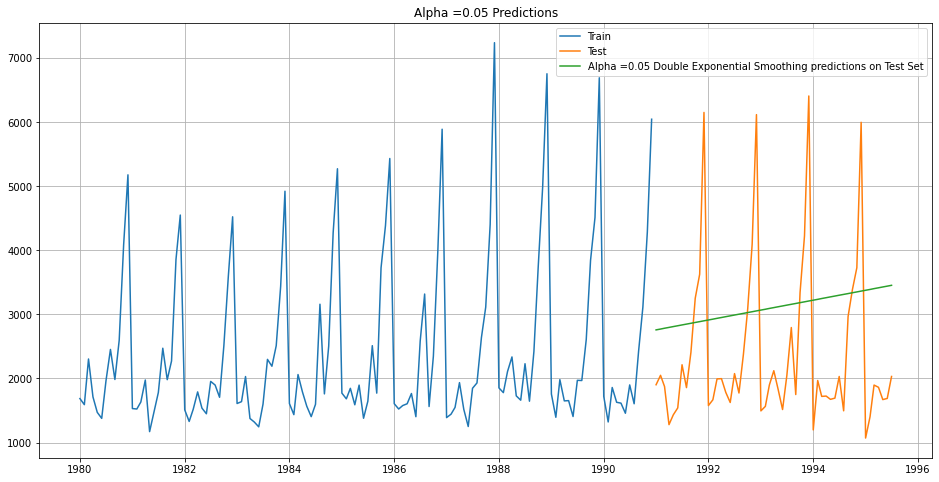

In [95]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Sparkling_DES_train['Sparkling'], label='Train')
plt.plot(Sparkling_DES_test['Sparkling'], label='Test')

plt.plot(Sparkling_DES_test['predict'], label='Alpha =0.05 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.05 Predictions');


#### Model Evaluation for $\alpha$ = 0.05,smoothing_slope=0.1 : Double Exponential Smoothing


In [96]:
rmse_Sparkling_test_DES1 = metrics.mean_squared_error(Sparkling_DES_test['Sparkling'],Sparkling_DES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Sparkling_test_DES1))


 For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1466.900


In [97]:
Sparkling_DES_test_1_df = pd.DataFrame({'Test RMSE': [rmse_Sparkling_test_DES1]},index=['Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing'])

In [98]:

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_DES_test_1_df])
Sparkling_resultsDf

Test RMSE
Linear Regression                                1389.135175
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                      770.928742 
4pointTrailingMovingAverage                      1137.137053
6pointTrailingMovingAverage                      1283.096993
9pointTrailingMovingAverage                      1354.277938
Alpha=0.2,SimpleExponentialSmoothing             1595.206839
Alpha=0.095,SimpleExponentialSmoothing           1368.363598
Alpha=0.0,SimpleExponentialSmoothing             1275.081823
Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  1466.899629

### Model  for Smoothening Level= 0.05,smoothing_slope=0.3,Smootheing : Double Exponential Smoothing

In [99]:
model_DES2 = Holt(Sparkling_DES_train['Sparkling']).fit(smoothing_level=0.05,smoothing_slope=0.3,optimized=False)
model_DES2.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.05,
 'smoothing_slope': 0.3,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 1686.0,
 'initial_slope': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [100]:
Sparkling_DES_test['predict'] = model_DES2.forecast(steps=len(Sparkling_test))
Sparkling_DES_test.head()


Sparkling      predict
YearMonth                         
1991-01-01  1902       2574.657783
1991-02-01  2049       2599.567670
1991-03-01  1874       2624.477557
1991-04-01  1279       2649.387445
1991-05-01  1432       2674.297332

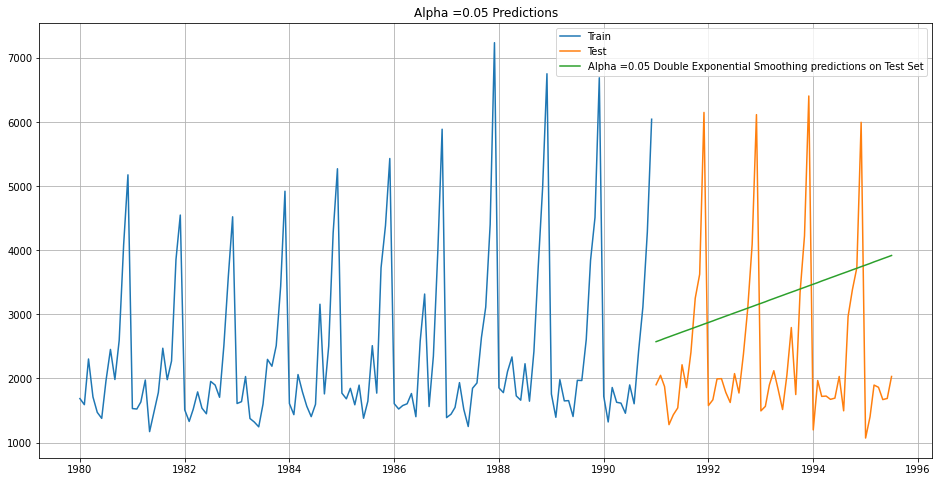

In [101]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Sparkling_DES_train['Sparkling'], label='Train')
plt.plot(Sparkling_DES_test['Sparkling'], label='Test')

plt.plot(Sparkling_DES_test['predict'], label='Alpha =0.05 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.05 Predictions');


### Model Evaluation for $\alpha$ = 0.05, Smoothening Level=0.3 : Double Exponential Smoothing


In [102]:
rmse_Sparkling_test_DSE2 = metrics.mean_squared_error(Sparkling_DES_test['Sparkling'],Sparkling_DES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.5 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Sparkling_test_DSE2))


 For Alpha =0.5 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1571.869


In [103]:
Sparkling_DES_test_2_df = pd.DataFrame({'Test RMSE': [rmse_Sparkling_test_DSE2]},index=['Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing'])


In [104]:

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_DES_test_2_df])
Sparkling_resultsDf

Test RMSE
Linear Regression                                1389.135175
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                      770.928742 
4pointTrailingMovingAverage                      1137.137053
6pointTrailingMovingAverage                      1283.096993
9pointTrailingMovingAverage                      1354.277938
Alpha=0.2,SimpleExponentialSmoothing             1595.206839
Alpha=0.095,SimpleExponentialSmoothing           1368.363598
Alpha=0.0,SimpleExponentialSmoothing             1275.081823
Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  1466.899629
Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing  1571.868573

### Model  for $\alpha$ = statsmodels to automatically find an optimized α value : Double Exponential Smoothing


In [105]:
model_DES3 = Holt(Sparkling_DES_train['Sparkling']).fit()
model_DES3.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.6477924009906908,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.083776800016,
 'initial_slope': 27.059653074962753,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [106]:
print(color.BOLD+color.BLUE+"Parameters automatically selected by model:")

model_DES3.params

Parameters automatically selected by model:


{'smoothing_level': 0.6477924009906908,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.083776800016,
 'initial_slope': 27.059653074962753,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [107]:
Sparkling_DES_test['predict'] = model_DES3.forecast(steps=len(Sparkling_test))
Sparkling_DES_test.head()


Sparkling      predict
YearMonth                         
1991-01-01  1902       5281.439591
1991-02-01  2049       5308.499244
1991-03-01  1874       5335.558897
1991-04-01  1279       5362.618550
1991-05-01  1432       5389.678203

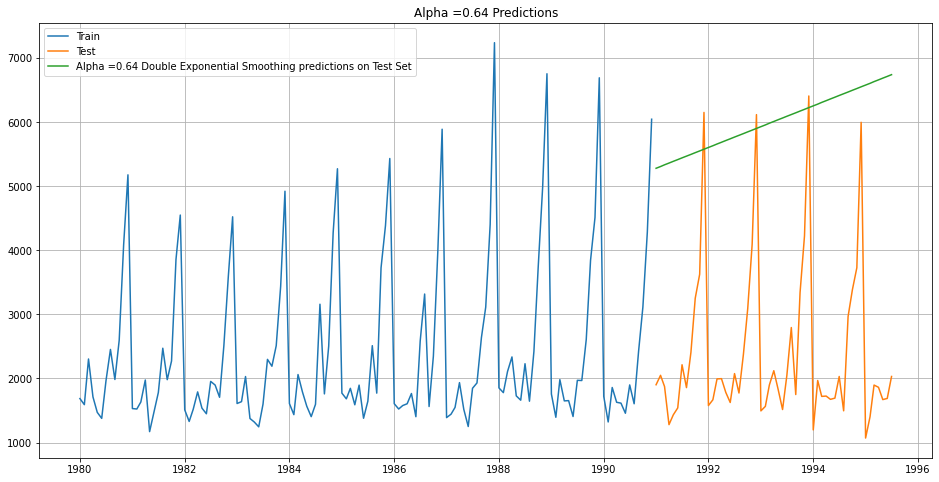

In [108]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Sparkling_DES_train['Sparkling'], label='Train')
plt.plot(Sparkling_DES_test['Sparkling'], label='Test')

plt.plot(Sparkling_DES_test['predict'], label='Alpha =0.64 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.64 Predictions');


### Model Evaluation for $\alpha$ = 0.64 : Double Exponential Smoothing


In [109]:
rmse_Sparkling_test_DES3 = metrics.mean_squared_error(Sparkling_DES_test['Sparkling'],Sparkling_DES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.64 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Sparkling_test_DES3))



 For Alpha =0.64 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 3850.990


In [110]:
Sparkling_DES_DES3_df = pd.DataFrame({'Test RMSE': [rmse_Sparkling_test_fit1]},index=['Alpha=0.2,DoubleExponentialSmoothing'])


In [111]:

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_DES_DES3_df])
Sparkling_resultsDf

Test RMSE
Linear Regression                                1389.135175
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                      770.928742 
4pointTrailingMovingAverage                      1137.137053
6pointTrailingMovingAverage                      1283.096993
9pointTrailingMovingAverage                      1354.277938
Alpha=0.2,SimpleExponentialSmoothing             1595.206839
Alpha=0.095,SimpleExponentialSmoothing           1368.363598
Alpha=0.0,SimpleExponentialSmoothing             1275.081823
Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  1466.899629
Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing  1571.868573
Alpha=0.2,DoubleExponentialSmoothing             1595.206839

# Method 7 : Triple Exponential Smoothening

In [112]:
Sparkling_TES_train = Sparkling_train.copy()
Sparkling_TES_test = Sparkling_test.copy()

### Model  for $\alpha$ = 0.2 : Triple Exponential Smoothing

In [113]:
Sparkling_model_TES1 = ExponentialSmoothing(Sparkling_TES_train['Sparkling']).fit(smoothing_level=0.2,smoothing_slope=0.1)
Sparkling_model_TES1.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.2,
 'smoothing_slope': 0.1,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1913.0253164556962,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [114]:

Sparkling_TES_test['predict'] = Sparkling_model_TES1.forecast(steps=len(Sparkling_TES_test))
Sparkling_TES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01  1902       3357.723951
1991-02-01  2049       3357.723951
1991-03-01  1874       3357.723951
1991-04-01  1279       3357.723951
1991-05-01  1432       3357.723951

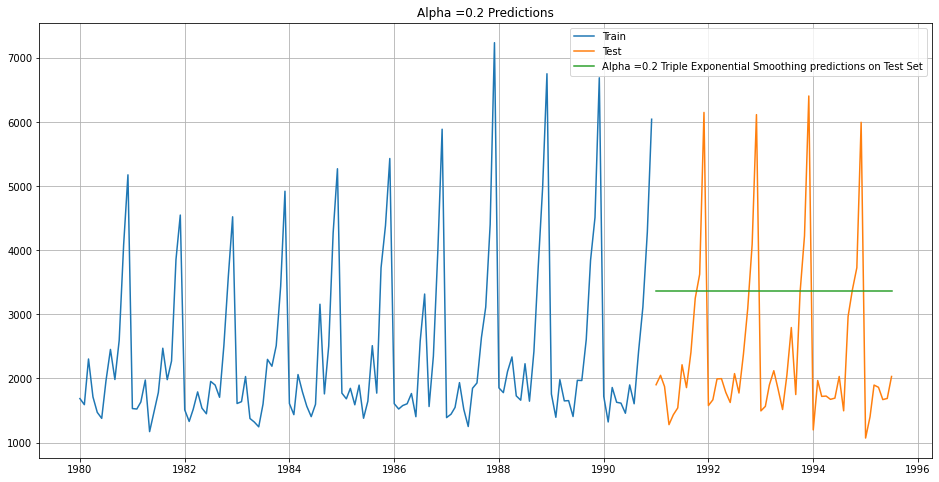

In [115]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Sparkling_TES_train['Sparkling'], label='Train')
plt.plot(Sparkling_TES_test['Sparkling'], label='Test')

plt.plot(Sparkling_TES_test['predict'], label='Alpha =0.2 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.2 Predictions');


#### Model Evaluation for $\alpha$ = 0.2 : Triple Exponential Smoothing


In [116]:
rmse_Sparkling_test_TES1 = metrics.mean_squared_error(Sparkling_TES_test['Sparkling'],Sparkling_TES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.2 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Sparkling_test_TES1))


 For Alpha =0.2 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 1595.207


In [117]:
Sparkling_TES_1_df = pd.DataFrame({'Test RMSE': [rmse_Sparkling_test_TES1]},index=['Alpha=0.2,TripleExponentialSmoothing'])


In [118]:

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_TES_1_df])
Sparkling_resultsDf

Test RMSE
Linear Regression                                1389.135175
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                      770.928742 
4pointTrailingMovingAverage                      1137.137053
6pointTrailingMovingAverage                      1283.096993
9pointTrailingMovingAverage                      1354.277938
Alpha=0.2,SimpleExponentialSmoothing             1595.206839
Alpha=0.095,SimpleExponentialSmoothing           1368.363598
Alpha=0.0,SimpleExponentialSmoothing             1275.081823
Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  1466.899629
Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing  1571.868573
Alpha=0.2,DoubleExponentialSmoothing             1595.206839
Alpha=0.2,TripleExponentialSmoothing             1595.206839

#### Model  for $\alpha$ = 0.05 : Simple Exponential Smoothing


In [119]:
Sparkling_model_TES2 = Holt(Sparkling_TES_train['Sparkling']).fit(smoothing_level=0.05,smoothing_slope=0.1,optimized=False)
Sparkling_model_TES2.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.05,
 'smoothing_slope': 0.1,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 1686.0,
 'initial_slope': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [120]:
Sparkling_TES_test['predict'] = Sparkling_model_TES2.forecast(steps=len(Sparkling_TES_test))
Sparkling_TES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01  1902       2758.389953
1991-02-01  2049       2771.273816
1991-03-01  1874       2784.157678
1991-04-01  1279       2797.041540
1991-05-01  1432       2809.925403

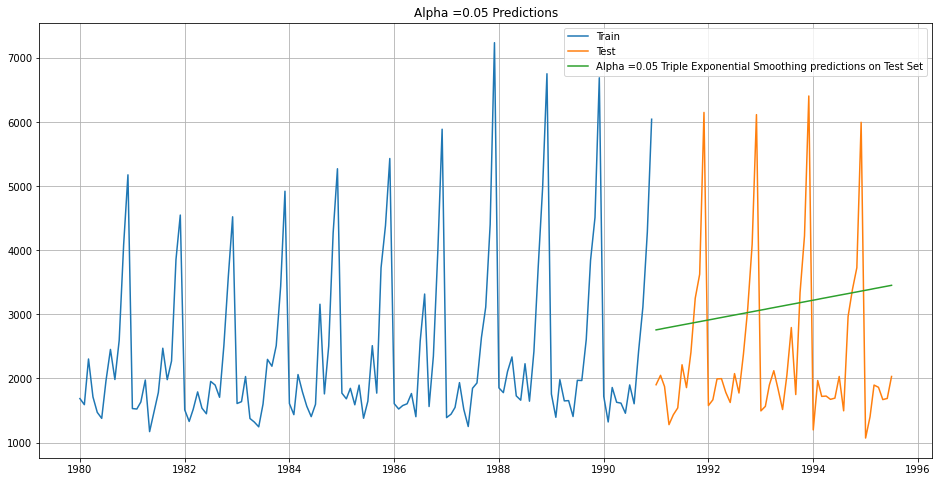

In [121]:

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Sparkling_TES_train['Sparkling'], label='Train')
plt.plot(Sparkling_TES_test['Sparkling'], label='Test')

plt.plot(Sparkling_TES_test['predict'], label='Alpha =0.05 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.05 Predictions');

#### Model Evaluation for $\alpha$ = 0.5 : Triple Exponential Smoothing


In [122]:
rmse_Sparkling_TES2 = metrics.mean_squared_error(Sparkling_TES_test['Sparkling'],Sparkling_TES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.05 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Sparkling_TES2))



 For Alpha =0.05 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 1466.900


In [123]:
Sparkling_TES_2_df = pd.DataFrame({'Test RMSE': [rmse_Sparkling_TES2]},index=['Alpha=0.05,TripleExponentialSmoothing'])



In [124]:

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_TES_2_df])
Sparkling_resultsDf

Test RMSE
Linear Regression                                1389.135175
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                      770.928742 
4pointTrailingMovingAverage                      1137.137053
6pointTrailingMovingAverage                      1283.096993
9pointTrailingMovingAverage                      1354.277938
Alpha=0.2,SimpleExponentialSmoothing             1595.206839
Alpha=0.095,SimpleExponentialSmoothing           1368.363598
Alpha=0.0,SimpleExponentialSmoothing             1275.081823
Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  1466.899629
Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing  1571.868573
Alpha=0.2,DoubleExponentialSmoothing             1595.206839
Alpha=0.2,TripleExponentialSmoothing             1595.206839
Alpha=0.05,TripleExponentialSmoothing            1466.899629

### Model  for $\alpha$ = statsmodels to automatically find an optimized α value : Triple Exponential Smoothing


In [125]:
Sparkling_model_TES3 = ExponentialSmoothing(Sparkling_TES_train['Sparkling']).fit()
Sparkling_model_TES3.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [126]:
Sparkling_TES_test['predict'] = Sparkling_model_TES3.forecast(steps=len(Sparkling_TES_test))
Sparkling_TES_test.head()


Sparkling      predict
YearMonth                         
1991-01-01  1902       2403.785622
1991-02-01  2049       2403.785622
1991-03-01  1874       2403.785622
1991-04-01  1279       2403.785622
1991-05-01  1432       2403.785622

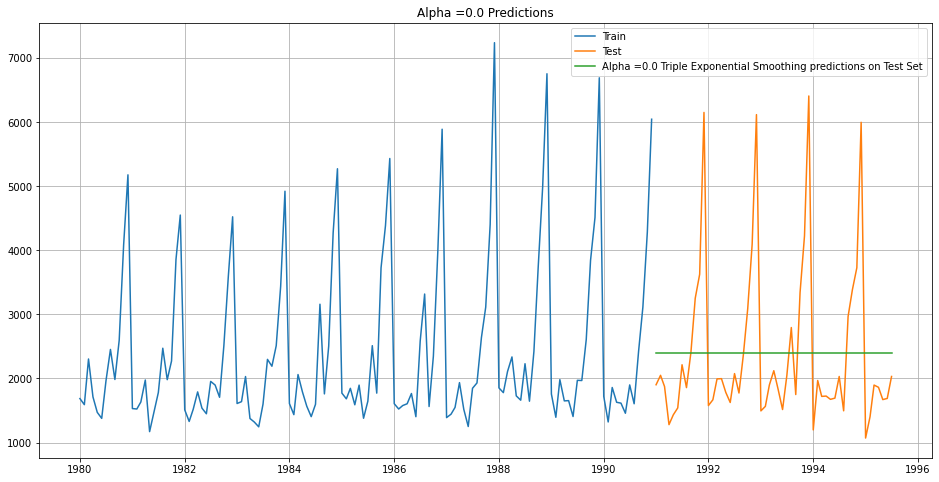

In [127]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Sparkling_TES_train['Sparkling'], label='Train')
plt.plot(Sparkling_TES_test['Sparkling'], label='Test')

plt.plot(Sparkling_TES_test['predict'], label='Alpha =0.0 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0 Predictions');


### Model Evaluation for $\alpha$ = 0.0 : Triple Exponential Smoothing


In [128]:
rmse_Sparkling_TES3 = metrics.mean_squared_error(Sparkling_TES_test['Sparkling'],Sparkling_TES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.2 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Sparkling_TES3))


 For Alpha =0.2 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 1275.082


In [129]:
Sparkling_TES_3_df = pd.DataFrame({'Test RMSE': [rmse_Sparkling_TES3]},index=['Alpha=0.2,TripleExponentialSmoothing'])


In [130]:


Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_TES_3_df])
Sparkling_resultsDf

Test RMSE
Linear Regression                                1389.135175
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                      770.928742 
4pointTrailingMovingAverage                      1137.137053
6pointTrailingMovingAverage                      1283.096993
9pointTrailingMovingAverage                      1354.277938
Alpha=0.2,SimpleExponentialSmoothing             1595.206839
Alpha=0.095,SimpleExponentialSmoothing           1368.363598
Alpha=0.0,SimpleExponentialSmoothing             1275.081823
Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  1466.899629
Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing  1571.868573
Alpha=0.2,DoubleExponentialSmoothing             1595.206839
Alpha=0.2,TripleExponentialSmoothing             1595.206839
Alpha=0.05,TripleExponentialSmoothing            1466.899629
Alpha=0.2,TripleExponentialSmoothing             1275.081823

<h2> Model Building- Rose Wine </h2>

<h3> Model 1: Linear Regression :</h3>

<b>Predicting Train and Test data :</b>

In [131]:
Rose_train_time = [i+1 for i in range(len(Rose_train))]
Rose_test_time = [i+133 for i in range(len(Rose_test))]
print(color.BOLD + color.BLUE+'Rose Wine Training Time instance','\n',Rose_train_time)
print("\n")
print(color.BOLD + color.BLUE+'Rose Wine Test Time instance','\n',Rose_test_time)


Rose Wine Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Rose Wine Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.


In [132]:
Rose_LinearRegression_train = Rose_train.copy()
Rose_LinearRegression_test = Rose_test.copy()

Rose_LinearRegression_train['time'] = Rose_train_time
Rose_LinearRegression_test['time'] = Rose_test_time


In [133]:
print(color.BOLD + color.BLUE+'First few rows of Training Data')
display(Rose_LinearRegression_train.head())
print(color.BOLD + color.BLUE+'Last few rows of Training Data')
display(Rose_LinearRegression_train.tail())
print(color.BOLD + color.BLUE+'First few rows of Test Data')
display(Rose_LinearRegression_test.head())
print(color.BOLD + color.BLUE+'Last few rows of Test Data')
display(Rose_LinearRegression_test.tail())


First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0  1   
1980-02-01  118.0  2   
1980-03-01  129.0  3   
1980-04-01  99.0   4   
1980-05-01  116.0  5

Last few rows of Training Data


Rose  time
YearMonth              
1990-08-01  70.0   128 
1990-09-01  83.0   129 
1990-10-01  65.0   130 
1990-11-01  110.0  131 
1990-12-01  132.0  132

First few rows of Test Data


Rose  time
YearMonth             
1991-01-01  54.0  133 
1991-02-01  55.0  134 
1991-03-01  66.0  135 
1991-04-01  65.0  136 
1991-05-01  60.0  137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0  183 
1995-04-01  52.0  184 
1995-05-01  28.0  185 
1995-06-01  40.0  186 
1995-07-01  62.0  187

In [134]:
#Building model 

from sklearn.linear_model import LinearRegression
lr_Rose = LinearRegression()
lr_Rose.fit(Rose_LinearRegression_train[['time']],Rose_LinearRegression_train['Rose'])


LinearRegression()

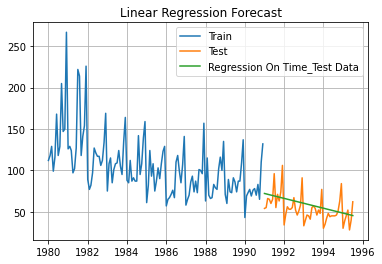

In [135]:
Rose_train_predictions_model1         = lr_Rose.predict(Rose_LinearRegression_train[['time']])
Rose_LinearRegression_train['RegOnTime'] = Rose_train_predictions_model1

Rose_test_predictions_model1         = lr_Rose.predict(Rose_LinearRegression_test[['time']])
Rose_LinearRegression_test['RegOnTime'] = Rose_test_predictions_model1

plt.plot(Rose_train['Rose'], label='Train')
plt.plot(Rose_test['Rose'], label='Test')
plt.plot(Rose_LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title("Linear Regression Forecast")
plt.grid();


#### Model Evaluation

In [136]:
Rose_rmse_model1_test = metrics.mean_squared_error(Rose_test['Rose'],Rose_test_predictions_model1,squared=False)
print(color.BOLD+color.BLUE+"For Linear Regression forecast on the Test Data,  RMSE is %3.3f " %(Rose_rmse_model1_test))


For Linear Regression forecast on the Test Data,  RMSE is 15.276 


In [137]:
Rose_resultsDf = pd.DataFrame({'Test RMSE': [Rose_rmse_model1_test]},index=['RegressionOnTime'])
Rose_resultsDf


Test RMSE
RegressionOnTime  15.275732

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$


In [138]:
Rose_NaiveModel_train = Rose_train.copy()
Rose_NaiveModel_test = Rose_test.copy()

In [139]:
Rose_NaiveModel_test['naive'] = np.asarray(Rose_train['Rose'])[len(np.asarray(Rose_train['Rose']))-1]


In [140]:
print(color.BOLD+color.BLUE+'First few rows of Training Data')
display(Rose_NaiveModel_train.head())
print(color.BOLD+color.BLUE+'Last few rows of Training Data')
display(Rose_NaiveModel_train.tail())
print(color.BOLD+color.BLUE+'First few rows of Test Data')
display(Rose_NaiveModel_test.head())
print(color.BOLD+color.BLUE+'Last few rows of Test Data')
display(Rose_NaiveModel_test.tail())


First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01  99.0 
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01  70.0 
1990-09-01  83.0 
1990-10-01  65.0 
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose  naive
YearMonth              
1991-01-01  54.0  132.0
1991-02-01  55.0  132.0
1991-03-01  66.0  132.0
1991-04-01  65.0  132.0
1991-05-01  60.0  132.0

Last few rows of Test Data


Rose  naive
YearMonth              
1995-03-01  45.0  132.0
1995-04-01  52.0  132.0
1995-05-01  28.0  132.0
1995-06-01  40.0  132.0
1995-07-01  62.0  132.0

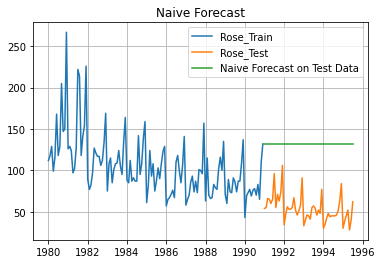

In [141]:
plt.plot(Rose_NaiveModel_train['Rose'], label='Rose_Train')
plt.plot(Rose_NaiveModel_test['Rose'], label='Rose_Test')

plt.plot(Rose_NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();


In [142]:
Rose_rmse_model2_test = metrics.mean_squared_error(Rose_test['Rose'],Rose_NaiveModel_test['naive'],squared=False)
print(color.BOLD+color.BLUE+"For Naive Approach forecast on the Test Data,  RMSE is %3.3f" %(Rose_rmse_model2_test))


For Naive Approach forecast on the Test Data,  RMSE is 79.739


In [143]:
Rose_resultsDf_2 = pd.DataFrame({'Test RMSE': [Rose_rmse_model2_test]},index=['NaiveModel'])

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf_2])
Rose_resultsDf

Test RMSE
RegressionOnTime  15.275732
NaiveModel        79.738550

## Method 3: Simple Average


In [144]:
Rose_SimpleAverage_train = Rose_train.copy()
Rose_SimpleAverage_test = Rose_test.copy()


In [145]:
Rose_SimpleAverage_test['mean_forecast'] = Rose_train['Rose'].mean()


In [146]:
print(color.BOLD+color.BLUE+'First few rows of Training Data')
display(Rose_SimpleAverage_train.head())
print(color.BOLD+color.BLUE+'Last few rows of Training Data')
display(Rose_SimpleAverage_train.tail())
print(color.BOLD+color.BLUE+'First few rows of Test Data')
display(Rose_SimpleAverage_test.head())
print(color.BOLD+color.BLUE+'Last few rows of Test Data')
display(Rose_SimpleAverage_test.tail())


First few rows of Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01  99.0 
1980-05-01  116.0

Last few rows of Training Data


Rose
YearMonth        
1990-08-01  70.0 
1990-09-01  83.0 
1990-10-01  65.0 
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Rose  mean_forecast
YearMonth                      
1991-01-01  54.0  104.939394   
1991-02-01  55.0  104.939394   
1991-03-01  66.0  104.939394   
1991-04-01  65.0  104.939394   
1991-05-01  60.0  104.939394

Last few rows of Test Data


Rose  mean_forecast
YearMonth                      
1995-03-01  45.0  104.939394   
1995-04-01  52.0  104.939394   
1995-05-01  28.0  104.939394   
1995-06-01  40.0  104.939394   
1995-07-01  62.0  104.939394

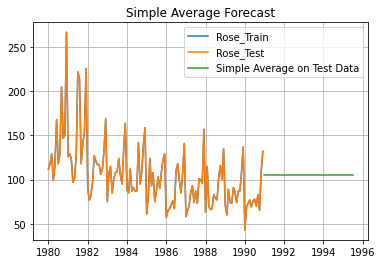

In [147]:
plt.plot(Rose_SimpleAverage_train['Rose'], label='Rose_Train')
plt.plot(Rose_SimpleAverage_train['Rose'], label='Rose_Test')

plt.plot(Rose_SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();


In [148]:
Rose_rmse_model3_test = metrics.mean_squared_error(Rose_test['Rose'],Rose_SimpleAverage_test['mean_forecast'],squared=False)
print(color.BOLD+color.BLUE+"For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(Rose_rmse_model3_test))


For Simple Average forecast on the Test Data,  RMSE is 53.481


In [149]:
Rose_resultsDf_3 = pd.DataFrame({'Test RMSE': [Rose_rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf_3])
Rose_resultsDf

Test RMSE
RegressionOnTime    15.275732
NaiveModel          79.738550
SimpleAverageModel  53.480857

## Method 4: Moving Average(MA) -Mean


In [150]:

Rose_MovingAverage = pd.DataFrame(Rose.copy())
Rose_MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01  99.0 
1980-05-01  116.0

In [151]:
#Trailing Moving Average

Rose_MovingAverage['Trailing_2'] = Rose_MovingAverage['Rose'].rolling(2).mean()
Rose_MovingAverage['Trailing_4'] = Rose_MovingAverage['Rose'].rolling(4).mean()
Rose_MovingAverage['Trailing_6'] = Rose_MovingAverage['Rose'].rolling(6).mean()
Rose_MovingAverage['Trailing_9'] = Rose_MovingAverage['Rose'].rolling(9).mean()


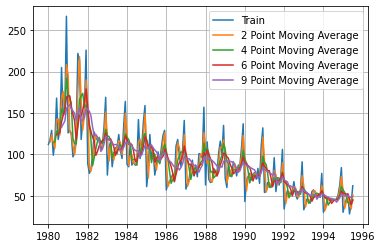

In [152]:
## Plotting on the whole data

plt.plot(Rose_MovingAverage['Rose'], label='Train')
plt.plot(Rose_MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(Rose_MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(Rose_MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(Rose_MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();


In [153]:
#Creating train and test set 
Rose_trailing_MovingAverage_train=Rose_MovingAverage[Rose_MovingAverage.index<'1991'] 
Rose_trailing_MovingAverage_test=Rose_MovingAverage[Rose_MovingAverage.index>'1991']


In [154]:
print(color.BOLD+color.BLUE+'First few rows of Training Data')
display(Rose_trailing_MovingAverage_train.head())
print(color.BOLD+color.BLUE+'Last few rows of Training Data')
display(Rose_trailing_MovingAverage_train.tail())
print(color.BOLD+color.BLUE+'First few rows of Test Data')
display(Rose_MovingAverage.head())
print(color.BOLD+color.BLUE+'Last few rows of Test Data')
display(Rose_MovingAverage.tail())


First few rows of Training Data


Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0 NaN         NaN         NaN         NaN        
1980-02-01  118.0  115.0      NaN         NaN         NaN        
1980-03-01  129.0  123.5      NaN         NaN         NaN        
1980-04-01  99.0   114.0       114.5      NaN         NaN        
1980-05-01  116.0  107.5       115.5      NaN         NaN

Last few rows of Training Data


Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1990-08-01  70.0   74.0        73.25       73.833333   76.888889 
1990-09-01  83.0   76.5        76.75       75.500000   70.888889 
1990-10-01  65.0   74.0        74.00       73.500000   73.333333 
1990-11-01  110.0  87.5        82.00       80.333333   77.888889 
1990-12-01  132.0  121.0       97.50       89.666667   84.444444

First few rows of Test Data


Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0 NaN         NaN         NaN         NaN        
1980-02-01  118.0  115.0      NaN         NaN         NaN        
1980-03-01  129.0  123.5      NaN         NaN         NaN        
1980-04-01  99.0   114.0       114.5      NaN         NaN        
1980-05-01  116.0  107.5       115.5      NaN         NaN

Last few rows of Test Data


Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                       
1995-03-01  45.0  42.0        49.50       52.000000   49.777778 
1995-04-01  52.0  48.5        41.50       52.166667   50.555556 
1995-05-01  28.0  40.0        41.00       46.333333   48.666667 
1995-06-01  40.0  34.0        41.25       39.000000   48.000000 
1995-07-01  62.0  51.0        45.50       44.333333   49.222222

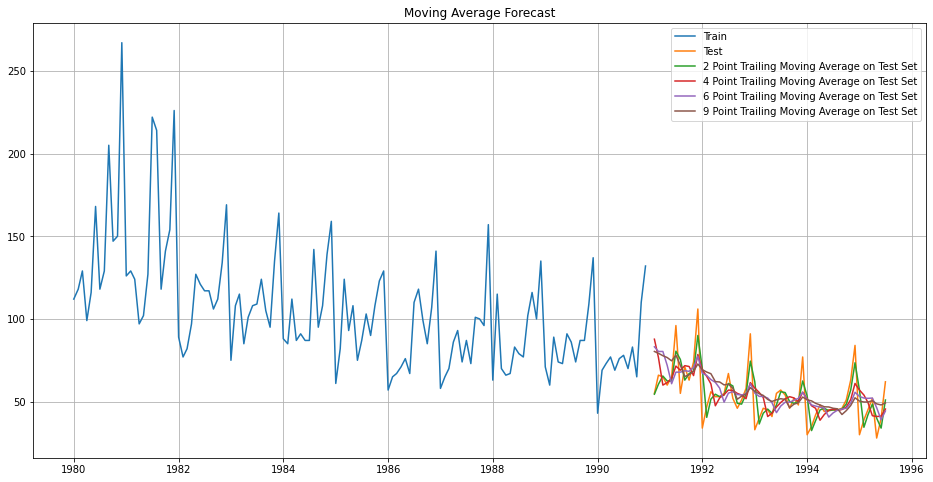

In [155]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Rose_trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(Rose_trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(Rose_trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(Rose_trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(Rose_trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(Rose_trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.title("Moving Average Forecast")
plt.grid();


### Model Evaluation


In [156]:
## Test Data - RMSE  --> 2 point Trailing MA

Rose_rmse_model4_test_2 = metrics.mean_squared_error(Rose_trailing_MovingAverage_test['Rose'],Rose_trailing_MovingAverage_test['Trailing_2'],squared=False)
print(color.BOLD+color.BLUE+"For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(Rose_rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

Rose_rmse_model4_test_4 = metrics.mean_squared_error(Rose_trailing_MovingAverage_test['Rose'],Rose_trailing_MovingAverage_test['Trailing_4'],squared=False)
print(color.BOLD+color.BLUE+"For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(Rose_rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

Rose_rmse_model4_test_6 = metrics.mean_squared_error(Rose_trailing_MovingAverage_test['Rose'],Rose_trailing_MovingAverage_test['Trailing_6'],squared=False)
print(color.BOLD+color.BLUE+"For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(Rose_rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

Rose_rmse_model4_test_9 = metrics.mean_squared_error(Rose_trailing_MovingAverage_test['Rose'],Rose_trailing_MovingAverage_test['Trailing_9'],squared=False)
print(color.BOLD+color.BLUE+"For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(Rose_rmse_model4_test_9))


For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 10.355
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 13.729
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 14.061
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 14.374


In [157]:
Rose_resultsDf_4 = pd.DataFrame({'Test RMSE': [Rose_rmse_model4_test_2,Rose_rmse_model4_test_4
                                          ,Rose_rmse_model4_test_6,Rose_rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])


In [158]:
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf_4])
Rose_resultsDf

Test RMSE
RegressionOnTime             15.275732
NaiveModel                   79.738550
SimpleAverageModel           53.480857
2pointTrailingMovingAverage  10.354816
4pointTrailingMovingAverage  13.729109
6pointTrailingMovingAverage  14.060788
9pointTrailingMovingAverage  14.374411

## Method 5 : Simple Exponential Smoothening

### Model 5 - Simple Expnential Smoothening


In [159]:
Rose_SES_train = Rose_train.copy()
Rose_SES_test = Rose_test.copy()


### Model  for $\alpha$ = 0.2 : Simple Exponential Smoothing


In [160]:
SES1_1 = SimpleExpSmoothing(Rose_SES_train['Rose']).fit(smoothing_level=0.2,optimized=False)
SES1_1.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.2,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [161]:

Rose_SES_test['predict'] = SES1_1.forecast(steps=len(Rose_SES_test))
Rose_SES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  92.096329
1991-02-01  55.0  92.096329
1991-03-01  66.0  92.096329
1991-04-01  65.0  92.096329
1991-05-01  60.0  92.096329

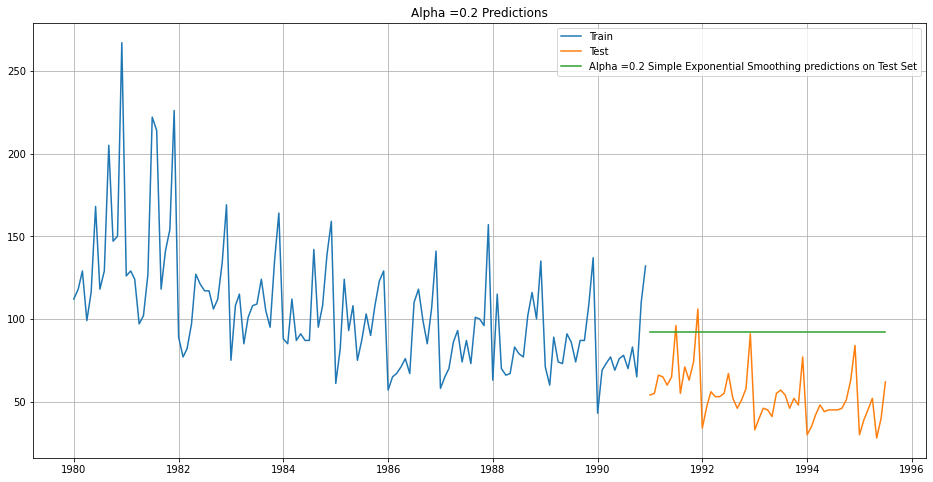

In [162]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Rose_SES_train['Rose'], label='Train')
plt.plot(Rose_SES_test['Rose'], label='Test')

plt.plot(Rose_SES_test['predict'], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.2 Predictions');


#### Model Evaluation for $\alpha$ = 0.2 : Simple Exponential Smoothing


In [163]:

rmse_Rose_test_fit1 = metrics.mean_squared_error(Rose_SES_test['Rose'],Rose_SES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.2 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Rose_test_fit1))


 For Alpha =0.2 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 41.382


In [164]:
Rose_SES_test_1_df = pd.DataFrame({'Test RMSE': [rmse_Rose_test_fit1]},index=['Alpha=0.2,SimpleExponentialSmoothing'])

In [165]:
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_SES_test_1_df])
Rose_resultsDf


Test RMSE
RegressionOnTime                      15.275732
NaiveModel                            79.738550
SimpleAverageModel                    53.480857
2pointTrailingMovingAverage           10.354816
4pointTrailingMovingAverage           13.729109
6pointTrailingMovingAverage           14.060788
9pointTrailingMovingAverage           14.374411
Alpha=0.2,SimpleExponentialSmoothing  41.382452


### Model  for $\alpha$ = 0.095 : Simple Exponential Smoothing

In [166]:
SES2 = SimpleExpSmoothing(Rose_SES_train['Rose']).fit(smoothing_level=0.095,optimized=False)
SES2.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.095,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [167]:

Rose_SES_test['predict'] = SES2.forecast(steps=len(Rose_SES_test))
Rose_SES_test.head()

Rose  predict
YearMonth                
1991-01-01  54.0  87.0063
1991-02-01  55.0  87.0063
1991-03-01  66.0  87.0063
1991-04-01  65.0  87.0063
1991-05-01  60.0  87.0063

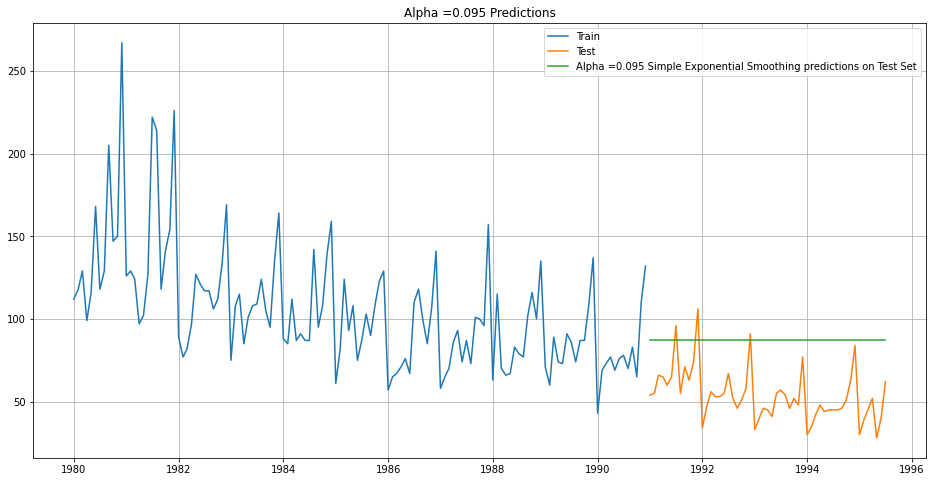

In [168]:
## Plotting on both the Training and Test data


plt.figure(figsize=(16,8))
plt.plot(Rose_SES_train['Rose'], label='Train')
plt.plot(Rose_SES_test['Rose'], label='Test')

plt.plot(Rose_SES_test['predict'], label='Alpha =0.095 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.095 Predictions');


### Model Evaluation for $\alpha$ = 0.095 : Simple Exponential Smoothing


In [169]:
rmse_Rose_test_fit2 = metrics.mean_squared_error(Rose_SES_test['Rose'],Rose_SES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.095 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Rose_test_fit2))



 For Alpha =0.095 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.728


In [170]:
Rose_SES_test_2_df = pd.DataFrame({'Test RMSE': [rmse_Rose_test_fit2]},index=['Alpha=0.095,SimpleExponentialSmoothing'])


In [171]:
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_SES_test_2_df])
Rose_resultsDf


Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741


### Model  for $\alpha$ = statsmodels to automatically find an optimized α value : Simple Exponential Smoothing

In [172]:
SES3 = SimpleExpSmoothing(Rose_SES_train['Rose']).fit()
SES3.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.09874989805931945,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38695595667537,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [173]:

Rose_SES_test['predict']= SES3.forecast(steps=len(Rose_SES_test))
Rose_SES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.104999
1991-02-01  55.0  87.104999
1991-03-01  66.0  87.104999
1991-04-01  65.0  87.104999
1991-05-01  60.0  87.104999

In [174]:
print(color.BOLD+color.BLUE+"Parameters automatically selected by model:")

SES3.params

Parameters automatically selected by model:


{'smoothing_level': 0.09874989805931945,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38695595667537,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

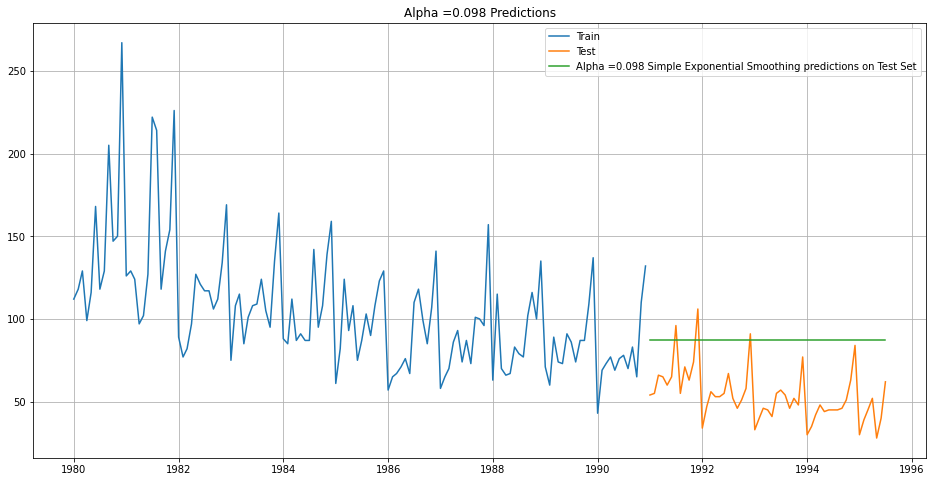

In [175]:
## Plotting on both the Training and Test data


plt.figure(figsize=(16,8))
plt.plot(Rose_SES_train['Rose'], label='Train')
plt.plot(Rose_SES_test['Rose'], label='Test')

plt.plot(Rose_SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');



### Model Evaluation for $\alpha$ = 0.098 : Simple Exponential Smoothing


In [176]:
rmse_Rose_test_fit3 = metrics.mean_squared_error(Rose_SES_test['Rose'],Rose_SES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Rose_test_fit3))


 For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.817


In [177]:
Rose_SES_test_3_df = pd.DataFrame({'Test RMSE': [rmse_Rose_test_fit3]},index=['Alpha=0.098,SimpleExponentialSmoothing'])

In [178]:
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_SES_test_3_df])
Rose_resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904

## Method 6: Double Exponential Smoothening

In [179]:
Rose_DES_train = Rose_train.copy()
Rose_DES_test = Rose_test.copy()


### Model  for Smoothening Level= 0.2,Smootheing : Double Exponential Smoothing


In [180]:
Rose_model_DES1 = Holt(Rose_DES_train['Rose']).fit(smoothing_level=0.2,smoothing_slope=0.1,optimized=False)
Rose_model_DES1.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.2,
 'smoothing_slope': 0.1,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [181]:

Rose_DES_test['predict'] = Rose_model_DES1.forecast(steps=len(Rose_DES_test))
Rose_DES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  90.543059
1991-02-01  55.0  91.434359
1991-03-01  66.0  92.325659
1991-04-01  65.0  93.216960
1991-05-01  60.0  94.108260

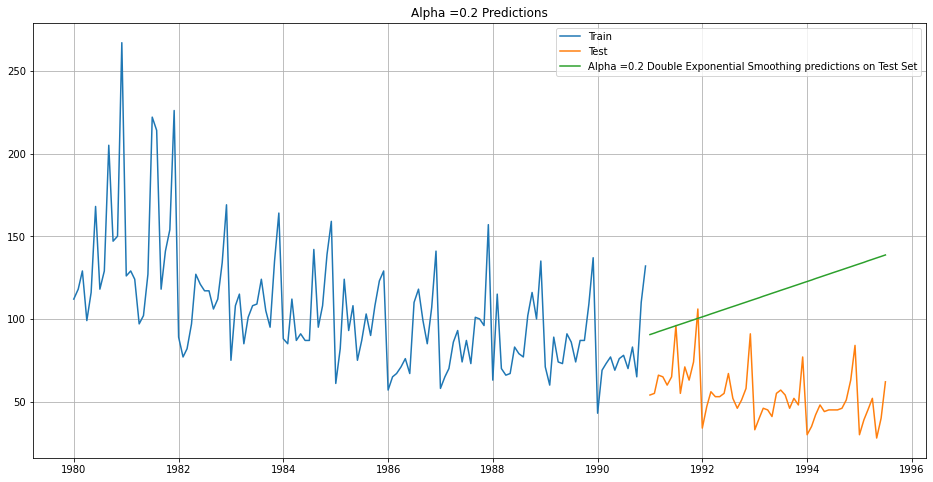

In [182]:

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Rose_DES_train['Rose'], label='Train')
plt.plot(Rose_DES_test['Rose'], label='Test')

plt.plot(Rose_DES_test['predict'], label='Alpha =0.2 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.2 Predictions');

#### Model Evaluation for $\alpha$ = 0.2 : Double Exponential Smoothing


In [183]:
rmse_Rose_test_DES1 = metrics.mean_squared_error(Rose_DES_test['Rose'],Rose_DES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.2 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Rose_test_DES1))


 For Alpha =0.2 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 65.755


In [184]:
Rose_DES_test_1_df = pd.DataFrame({'Test RMSE': [rmse_Rose_test_DES1]},index=['Alpha=0.2,DoubleExponentialSmoothing'])


In [185]:

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_DES_test_1_df])
Rose_resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904
Alpha=0.2,DoubleExponentialSmoothing    65.754737

### Model  for Smoothening Level= 0.05,Smootheing : Double Exponential Smoothing


In [186]:
Rose_model_DES2 = Holt(Rose_DES_train['Rose']).fit(smoothing_level=0.05,smoothing_slope=0.3,optimized=False)
Rose_model_DES2.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.05,
 'smoothing_slope': 0.3,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [187]:
Rose_DES_test['predict'] = Rose_model_DES2.forecast(steps=len(Rose_DES_test))
Rose_DES_test.head()


Rose    predict
YearMonth                  
1991-01-01  54.0  79.622476
1991-02-01  55.0  79.099805
1991-03-01  66.0  78.577134
1991-04-01  65.0  78.054462
1991-05-01  60.0  77.531791

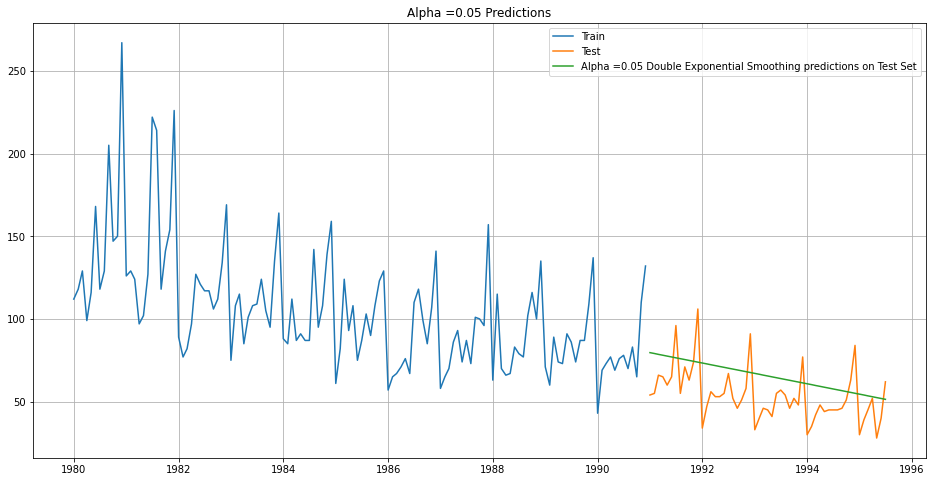

In [188]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Rose_DES_train['Rose'], label='Train')
plt.plot(Rose_DES_test['Rose'], label='Test')

plt.plot(Rose_DES_test['predict'], label='Alpha =0.05 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.05 Predictions');



#### Model Evaluation for $\alpha$ = 0.05 : Double Exponential Smoothing


In [189]:
rmse_Rose_test_DSE2 = metrics.mean_squared_error(Rose_DES_test['Rose'],Rose_DES_test['predict'],squared=False)
print("For Alpha =0.05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Rose_test_DSE2))


For Alpha =0.05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 18.636


In [190]:
Rose_DES_test_2_df = pd.DataFrame({'Test RMSE': [rmse_Rose_test_DSE2]},index=['Alpha=0.05,DoubleExponentialSmoothing'])


In [191]:
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_DES_test_2_df])
Rose_resultsDf


Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904
Alpha=0.2,DoubleExponentialSmoothing    65.754737
Alpha=0.05,DoubleExponentialSmoothing   18.636392

#### Model  for $\alpha$ = statsmodels to automatically find an optimized α value : Double Exponential Smoothing


In [192]:
Rose_model_DES3 = Holt(Rose_DES_train['Rose']).fit()
Rose_model_DES3.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [193]:
print(color.BOLD+color.BLUE+"Parameters automatically selected by model:")
Rose_model_DES3.params

Parameters automatically selected by model:


{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [194]:
Rose_DES_test['predict'] = Rose_model_DES3.forecast(steps=len(Rose_DES_test))
Rose_DES_test.head()


Rose    predict
YearMonth                  
1991-01-01  54.0  86.863579
1991-02-01  55.0  88.028056
1991-03-01  66.0  89.192534
1991-04-01  65.0  90.357011
1991-05-01  60.0  91.521488

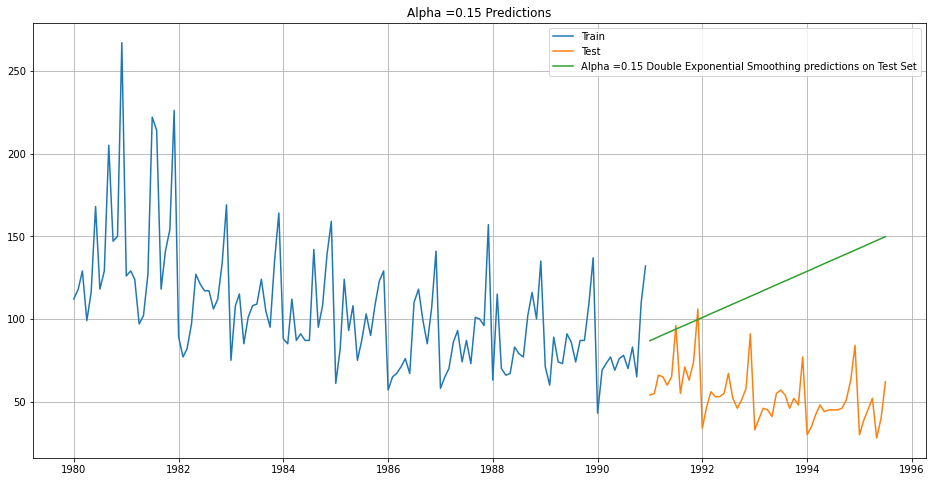

In [195]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Rose_DES_train['Rose'], label='Train')
plt.plot(Rose_DES_test['Rose'], label='Test')

plt.plot(Rose_DES_test['predict'], label='Alpha =0.15 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.15 Predictions');


#### Model Evaluation for $\alpha$ = 0.15 : Double Exponential Smoothing


In [196]:
rmse_Rose_test_DES3 = metrics.mean_squared_error(Rose_DES_test['Rose'],Rose_DES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.15 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Rose_test_DES3))


 For Alpha =0.15 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 70.596


In [197]:
Rose_DES_DES3_df = pd.DataFrame({'Test RMSE': [rmse_Rose_test_fit1]},index=['Alpha=0.15,DoubleExponentialSmoothing'])


In [198]:
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_DES_DES3_df])
Rose_resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904
Alpha=0.2,DoubleExponentialSmoothing    65.754737
Alpha=0.05,DoubleExponentialSmoothing   18.636392
Alpha=0.15,DoubleExponentialSmoothing   41.382452

# Method 7: Triple Exponential Smoothening

In [199]:
Rose_TES_train = Rose_train.copy()
Rose_TES_test = Rose_test.copy()

### Model  for $\alpha$ = 0.2 : Triple Exponential Smoothing

In [200]:
Rose_model_TES1 = ExponentialSmoothing(Rose_TES_train['Rose']).fit(smoothing_level=0.2,smoothing_slope=0.1)
Rose_model_TES1.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.2,
 'smoothing_slope': 0.1,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 127.65231152135098,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [201]:
Rose_TES_test['predict'] = Rose_model_TES1.forecast(steps=len(Rose_TES_test))
Rose_TES_test.head()


Rose    predict
YearMonth                  
1991-01-01  54.0  92.096329
1991-02-01  55.0  92.096329
1991-03-01  66.0  92.096329
1991-04-01  65.0  92.096329
1991-05-01  60.0  92.096329

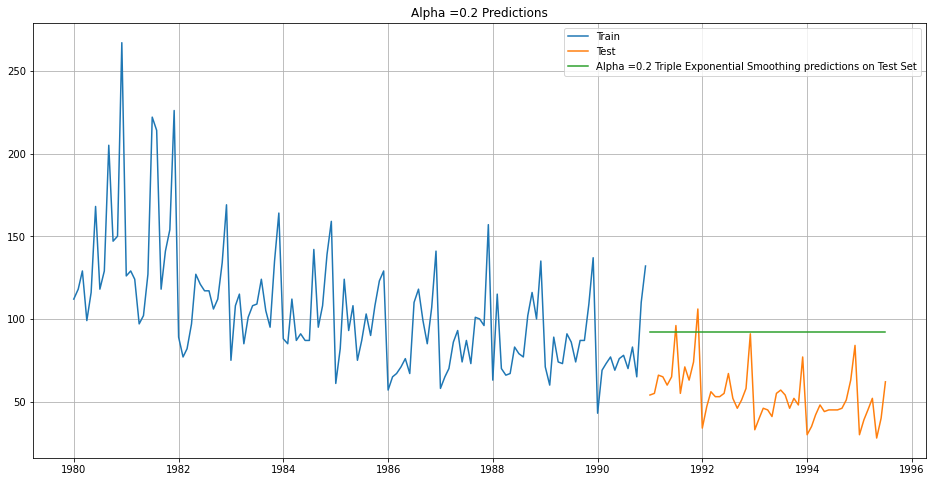

In [202]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Rose_TES_train['Rose'], label='Train')
plt.plot(Rose_TES_test['Rose'], label='Test')

plt.plot(Rose_TES_test['predict'], label='Alpha =0.2 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.2 Predictions');


#### Model Evaluation for $\alpha$ = 0.2 : Triple Exponential Smoothing


In [203]:
rmse_Rose_test_TES1 = metrics.mean_squared_error(Rose_TES_test['Rose'],Rose_TES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.2 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Rose_test_TES1))


 For Alpha =0.2 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 41.382


In [204]:
Rose_TES_1_df = pd.DataFrame({'Test RMSE': [rmse_Rose_test_TES1]},index=['Alpha=0.2,TripleExponentialSmoothing'])


In [205]:
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_TES_1_df])
Rose_resultsDf


Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904
Alpha=0.2,DoubleExponentialSmoothing    65.754737
Alpha=0.05,DoubleExponentialSmoothing   18.636392
Alpha=0.15,DoubleExponentialSmoothing   41.382452
Alpha=0.2,TripleExponentialSmoothing    41.382452

In [206]:
### Model  for $\alpha$ = 0.95 : Triple Exponential Smoothing


In [207]:
Rose_model_TES2 = ExponentialSmoothing(Rose_TES_train['Rose']).fit(smoothing_level=0.95,smoothing_slope=0.9)
Rose_model_TES2.params

C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.95,
 'smoothing_slope': 0.9,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.32355667343089,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [208]:
Rose_TES_test['predict'] = Rose_model_TES2.forecast(steps=len(Rose_TES_test))
Rose_TES_test.head()


Rose     predict
YearMonth                   
1991-01-01  54.0  130.789671
1991-02-01  55.0  130.789671
1991-03-01  66.0  130.789671
1991-04-01  65.0  130.789671
1991-05-01  60.0  130.789671

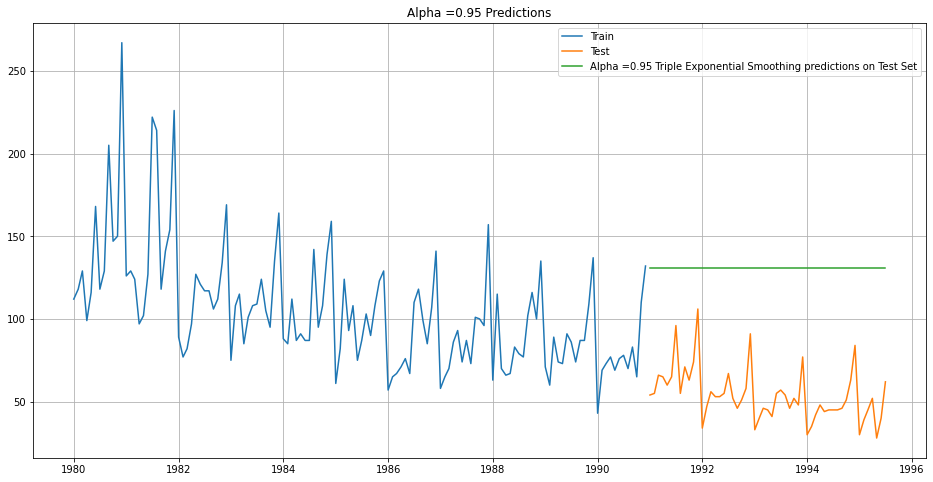

In [209]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Rose_TES_train['Rose'], label='Train')
plt.plot(Rose_TES_test['Rose'], label='Test')

plt.plot(Rose_TES_test['predict'], label='Alpha =0.95 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.95 Predictions');


### Model Evaluation for $\alpha$ = 0.95 : Triple Exponential Smoothing


In [210]:
rmse_Rose_test_TES2 = metrics.mean_squared_error(Rose_TES_test['Rose'],Rose_TES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.95 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Rose_test_TES2))


 For Alpha =0.95 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 78.552


In [211]:
Rose_TES_2_df = pd.DataFrame({'Test RMSE': [rmse_Rose_test_TES2]},index=['Alpha=0.95,TripleExponentialSmoothing'])


In [212]:


Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_TES_2_df])
Rose_resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904
Alpha=0.2,DoubleExponentialSmoothing    65.754737
Alpha=0.05,DoubleExponentialSmoothing   18.636392
Alpha=0.15,DoubleExponentialSmoothing   41.382452
Alpha=0.2,TripleExponentialSmoothing    41.382452
Alpha=0.95,TripleExponentialSmoothing   78.552491

### Model  for $\alpha$ = statsmodels to automatically find an optimized α value : Triple Exponential Smoothing


In [213]:
Rose_model_TES3 = Holt(Rose_TES_train['Rose']).fit()
print(color.BOLD+color.BLUE+"Parameters automatically selected by model:")
Rose_model_TES3.params

Parameters automatically selected by model:


C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [214]:
Rose_TES_test['predict'] = Rose_model_TES3.forecast(steps=len(Rose_TES_test))
Rose_TES_test.head()


Rose    predict
YearMonth                  
1991-01-01  54.0  86.863579
1991-02-01  55.0  88.028056
1991-03-01  66.0  89.192534
1991-04-01  65.0  90.357011
1991-05-01  60.0  91.521488

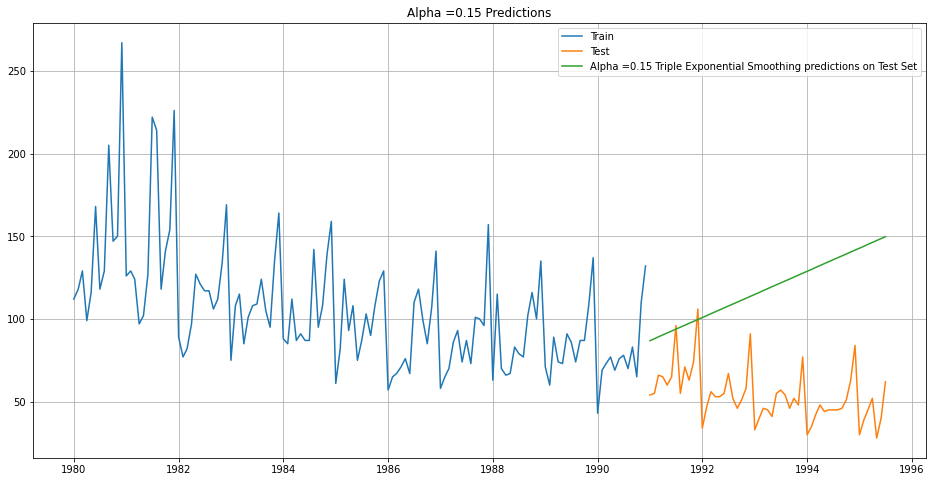

In [215]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Rose_TES_train['Rose'], label='Train')
plt.plot(Rose_TES_test['Rose'], label='Test')

plt.plot(Rose_TES_test['predict'], label='Alpha =0.15 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.15 Predictions');


### Model Evaluation for $\alpha$ = 0.15 : Triple Exponential Smoothing


In [216]:
rmse_Rose_TES3 = metrics.mean_squared_error(Rose_TES_test['Rose'],Rose_TES_test['predict'],squared=False)
print(color.BOLD+color.BLUE,"For Alpha =0.15 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_Rose_TES3))


 For Alpha =0.15 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 70.596


In [217]:
Rose_TES_3_df = pd.DataFrame({'Test RMSE': [rmse_Rose_TES3]},index=['Alpha=0.15,TripleExponentialSmoothing'])


In [218]:

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_TES_3_df])
Rose_resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904
Alpha=0.2,DoubleExponentialSmoothing    65.754737
Alpha=0.05,DoubleExponentialSmoothing   18.636392
Alpha=0.15,DoubleExponentialSmoothing   41.382452
Alpha=0.2,TripleExponentialSmoothing    41.382452
Alpha=0.95,TripleExponentialSmoothing   78.552491
Alpha=0.15,TripleExponentialSmoothing   70.595962

***
<h2>5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.</h2>
<br>
<h3>Solution:</h3>

In [219]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

 Applying Augmented Dickey-Fuller test to Sparkling data set to check for stationarity


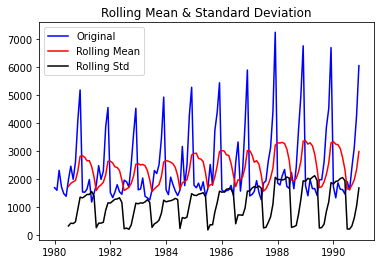

Results of Dickey-Fuller Test:
Test Statistic                -1.208926  
p-value                        0.669744  
#Lags Used                     12.000000 
Number of Observations Used    119.000000
Critical Value (1%)           -3.486535  
Critical Value (5%)           -2.886151  
Critical Value (10%)          -2.579896  
dtype: float64 



In [220]:
print(color.BOLD+color.DARKCYAN,"Applying Augmented Dickey-Fuller test to Sparkling data set to check for stationarity")
test_stationarity(Sparkling_train['Sparkling'])

 Applying Augmented Dickey-Fuller test to log-transformed Sparkling data set to check for stationarity


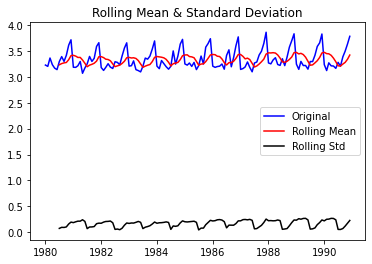

Results of Dickey-Fuller Test:
Test Statistic                -1.498035  
p-value                        0.534483  
#Lags Used                     12.000000 
Number of Observations Used    119.000000
Critical Value (1%)           -3.486535  
Critical Value (5%)           -2.886151  
Critical Value (10%)          -2.579896  
dtype: float64 



In [221]:
print(color.BOLD+color.DARKCYAN,"Applying Augmented Dickey-Fuller test to log-transformed Sparkling data set to check for stationarity")
test_stationarity(np.log10(Sparkling_train['Sparkling']))

### Neither original nor log-transformed series is stationary. Hence, a stationarization is necessary.

 Applying Augmented Dickey-Fuller test to Rose data set to check for stationarity


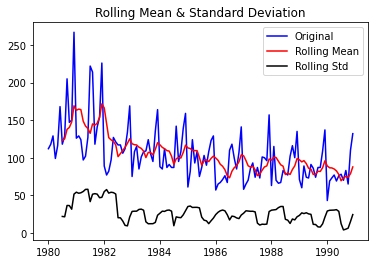

Results of Dickey-Fuller Test:
Test Statistic                -2.164250  
p-value                        0.219476  
#Lags Used                     13.000000 
Number of Observations Used    118.000000
Critical Value (1%)           -3.487022  
Critical Value (5%)           -2.886363  
Critical Value (10%)          -2.580009  
dtype: float64 



In [222]:
print(color.BOLD+color.DARKCYAN,"Applying Augmented Dickey-Fuller test to Rose data set to check for stationarity")
test_stationarity(Rose_train['Rose'])

 Applying Augmented Dickey-Fuller test to log-transformed Rose data set to check for stationarity


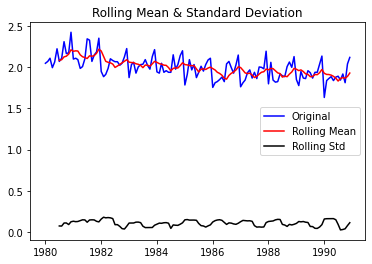

Results of Dickey-Fuller Test:
Test Statistic                -1.535083  
p-value                        0.516091  
#Lags Used                     11.000000 
Number of Observations Used    120.000000
Critical Value (1%)           -3.486056  
Critical Value (5%)           -2.885943  
Critical Value (10%)          -2.579785  
dtype: float64 



In [223]:
print(color.BOLD+color.DARKCYAN,"Applying Augmented Dickey-Fuller test to log-transformed Rose data set to check for stationarity")
test_stationarity(np.log10(Rose_train['Rose']))

###  Neither original nor log-transformed series is stationary. Hence, a stationarization is necessary.

### To Make the series Stationary

 Applying Augmented Dickey-Fuller test to differnced Sparkling train data set to check for stationarity


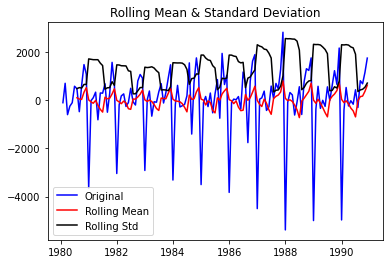

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [224]:
print(color.BOLD+color.DARKCYAN,"Applying Augmented Dickey-Fuller test to differnced Sparkling train data set to check for stationarity")
Sparkling_train_st=pd.DataFrame(Sparkling_train['Sparkling'].diff().dropna())
test_stationarity(Sparkling_train_st)

 Applying Augmented Dickey-Fuller test to differenced Rose data set to check for stationarity


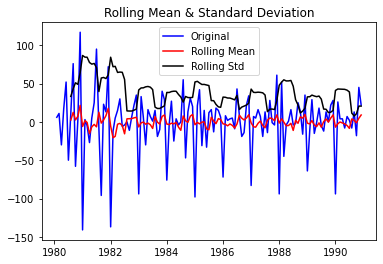

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [225]:
print(color.BOLD+color.DARKCYAN,"Applying Augmented Dickey-Fuller test to differenced Rose data set to check for stationarity")
Rose_train_st=pd.DataFrame(Rose_train['Rose'].diff().dropna())
test_stationarity(Rose_train_st)

***
<h2>6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.</h2>
<br>
<h3>Solution:</h3>

## ARIMA - Sparkling DataSet

In [226]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [227]:
# Creating an empty Dataframe with column names only
Sparkling_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

In [228]:
for param in pdq:
    ARIMA_model = ARIMA(Sparkling_train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    Sparkling_ARIMA_AIC = Sparkling_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.90643899768
ARIMA(0, 1, 2) - AIC:2232.783097685749
ARIMA(1, 1, 0) - AIC:2268.5280613021696
ARIMA(1, 1, 1) - AIC:2235.013945351209
ARIMA(1, 1, 2) - AIC:2233.597647118897
ARIMA(2, 1, 0) - AIC:2262.035600260619
ARIMA(2, 1, 1) - AIC:2232.36048987896
ARIMA(2, 1, 2) - AIC:2210.6213693964587


C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [229]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

Sparkling_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
8  (2, 1, 2)  2210.621369
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945

In [230]:
Sparkling_auto_ARIMA = ARIMA(Sparkling_train['Sparkling'], order=(0,1,2),freq='MS')

Sparkling_results_auto_ARIMA = Sparkling_auto_ARIMA.fit()

print(Sparkling_results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1112.392
Method:                       css-mle   S.D. of innovations           1159.696
Date:                Sun, 21 Feb 2021   AIC                           2232.783
Time:                        22:29:39   BIC                           2244.284
Sample:                    02-01-1980   HQIC                          2237.456
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2469      3.800      1.644      0.100      -1.201      13.695
ma.L1.D.Sparkling    -0.5555      0.073     -7.583      0.000      -0.699      -0.412
ma.L2.D.Sparkling    -0.

#### Predict on the Test Set using this model and evaluate the model.

In [231]:
Sparkling_predicted_auto_ARIMA = Sparkling_results_auto_ARIMA.forecast(steps=len(Sparkling_test))

In [232]:
from sklearn.metrics import  mean_squared_error

Sparkling_ARIMA_AUTO_rmse = mean_squared_error(Sparkling_test['Sparkling'],Sparkling_predicted_auto_ARIMA[0],squared=False)

print(color.BOLD+color.BLUE+"For ARIMA model forecast on the Testing Data,  RMSE is %3.3f" %(Sparkling_ARIMA_AUTO_rmse))

For ARIMA model forecast on the Testing Data,  RMSE is 1417.493


In [233]:
Sparkling_ARIMA_df = pd.DataFrame({'Test RMSE': [Sparkling_ARIMA_AUTO_rmse]}
                           ,index=['AUTO ARIMA'])

In [234]:

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_ARIMA_df])
Sparkling_resultsDf

Test RMSE
Linear Regression                                1389.135175
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                      770.928742 
4pointTrailingMovingAverage                      1137.137053
6pointTrailingMovingAverage                      1283.096993
9pointTrailingMovingAverage                      1354.277938
Alpha=0.2,SimpleExponentialSmoothing             1595.206839
Alpha=0.095,SimpleExponentialSmoothing           1368.363598
Alpha=0.0,SimpleExponentialSmoothing             1275.081823
Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  1466.899629
Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing  1571.868573
Alpha=0.2,DoubleExponentialSmoothing             1595.206839
Alpha=0.2,TripleExponentialSmoothing             1595.206839
Alpha=0.05,TripleExponentialSmoothing            1466.899629
Alpha=0.2,TripleExponentialSmoothing             1275.081823
AUTO ARIMA                                       1417.492916

## SARIMA with seasonality 06 - Sparkling Model

In [235]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [236]:
Sparkling_SARIMA_AIC_06 = pd.DataFrame(columns=['param','seasonal', 'AIC'])

In [237]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        Sparkling_SARIMA_AIC_06 = Sparkling_SARIMA_AIC_06.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716284
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890837
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984443351
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111428211
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510316


C:\Users\POOJA\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657944
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082834
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339547746
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428778256
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298135632
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274087142
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885104026698
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933222941
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.5334288368351
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.4410101686985
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840215965
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.11514517759
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.739568923424
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.411129824141
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6963213236213
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.6537079049663
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1793.6191012248871
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AI

In [238]:
Sparkling_SARIMA_AIC_06.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.678698
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888804
17  (0, 1, 1)  (2, 0, 2, 6)  1741.533429
44  (1, 1, 1)  (2, 0, 2, 6)  1743.379778
71  (2, 1, 1)  (2, 0, 2, 6)  1744.040752

In [239]:
import statsmodels.api as sm

Sparkling_auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Sparkling_results_auto_SARIMA_6 = Sparkling_auto_SARIMA_6.fit(maxiter=1000)
print(Sparkling_results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Sun, 21 Feb 2021   AIC                           1727.679
Time:                                   22:30:24   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6449      0.286     -2.256      0.024      -1.205      -0.085
ma.L1         -0.1068      0.250     -0.428

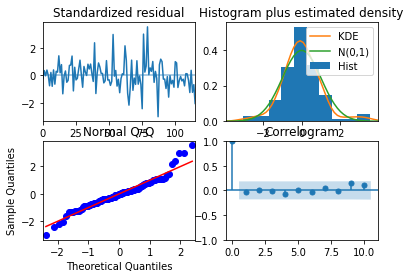

In [240]:
Sparkling_results_auto_SARIMA_6.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [241]:
Sparkling_predicted_auto_SARIMA_6 = Sparkling_results_auto_SARIMA_6.get_forecast(steps=len(Sparkling_test))
Sparkling_predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.373202  380.571690  584.466397     2076.280007  
1  1177.286477  392.122873  408.739768     1945.833187  
2  1625.885966  392.317483  856.957829     2394.814103  
3  1546.307025  397.718244  766.793590     2325.820461  
4  1308.786521  398.938403  526.881618     2090.691423

In [242]:
Sparkling_SARIMA_rmse_06 = mean_squared_error(Sparkling_test['Sparkling'],Sparkling_predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(color.BOLD+color.BLUE+"For SARIMA with seasonality 06 on the Test Data,  RMSE is %3.3f" %(Sparkling_SARIMA_rmse_06))


For SARIMA with seasonality 06 on the Test Data,  RMSE is 626.890


In [243]:
Sparkling_SARIMA_df_06 = pd.DataFrame({'Test RMSE': [Sparkling_SARIMA_rmse_06]}
                           ,index=['SARIMA_06_Seasonality'])

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_SARIMA_df_06])
Sparkling_resultsDf

Test RMSE
Linear Regression                                1389.135175
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                      770.928742 
4pointTrailingMovingAverage                      1137.137053
6pointTrailingMovingAverage                      1283.096993
9pointTrailingMovingAverage                      1354.277938
Alpha=0.2,SimpleExponentialSmoothing             1595.206839
Alpha=0.095,SimpleExponentialSmoothing           1368.363598
Alpha=0.0,SimpleExponentialSmoothing             1275.081823
Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  1466.899629
Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing  1571.868573
Alpha=0.2,DoubleExponentialSmoothing             1595.206839
Alpha=0.2,TripleExponentialSmoothing             1595.206839
Alpha=0.05,TripleExponentialSmoothing            1466.899629
Alpha=0.2,TripleExponentialSmoothing             1275.081823
AUTO ARIMA                                       1417.492916
SARIMA_06_Seasonality                            626.890392

## SARIMA with seasonality 12 - Sparkling Model

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [244]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [245]:
Sparkling_SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC'])


In [246]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        Sparkling_SARIMA_AIC_12 = Sparkling_SARIMA_AIC_12.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.26146168447
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640234122
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389326
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.21087357917
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158603798
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920829
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566423
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572820646
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183797
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193753004
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.150914452287
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954178073
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.224508418928
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824113045
SARIMA(0, 1, 2)x(0

In [247]:
Sparkling_SARIMA_AIC_12.sort_values(by=['AIC']).head()


param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934564
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340405

In [248]:
import statsmodels.api as sm

Sparkling_auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Sparkling_results_auto_SARIMA_12 = Sparkling_auto_SARIMA_12.fit(maxiter=1000)
print(Sparkling_results_auto_SARIMA_12.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -769.967
Date:                            Sun, 21 Feb 2021   AIC                           1555.935
Time:                                    22:31:44   BIC                           1577.090
Sample:                                         0   HQIC                          1564.505
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6381      0.287     -2.226      0.026      -1.200      -0.076
ma.L1         -0.3049      0.185   

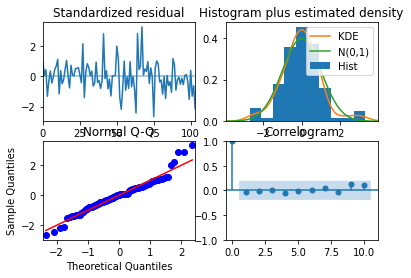

In [249]:

Sparkling_results_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.


In [250]:
Sparkling_predicted_auto_SARIMA_12 = Sparkling_results_auto_SARIMA_12.get_forecast(steps=len(Sparkling_test))
Sparkling_predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()


y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1317.772039  390.287857  552.821896     2082.722183  
1  1309.785828  403.657514  518.631638     2100.940019  
2  1608.813707  403.669576  817.635877     2399.991538  
3  1599.912038  409.172368  797.948934     2401.875142  
4  1378.264883  410.023207  574.634164     2181.895602

In [251]:
Sparkling_SARIMA_rmse12 = mean_squared_error(Sparkling_test['Sparkling'],Sparkling_predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(color.BOLD+color.BLUE+"For SARIMA with seasonality 12 forecast on the Test Data,  RMSE is %3.3f" %(Sparkling_SARIMA_rmse12))


For SARIMA with seasonality 12 forecast on the Test Data,  RMSE is 546.515


In [252]:
Sparkling_SARIMA_df_12 = pd.DataFrame({'Test RMSE': [Sparkling_SARIMA_rmse12]}
                           ,index=['SARIMA_12_Seasonality'])


In [253]:

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_SARIMA_df_12])
Sparkling_resultsDf

Test RMSE
Linear Regression                                1389.135175
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                      770.928742 
4pointTrailingMovingAverage                      1137.137053
6pointTrailingMovingAverage                      1283.096993
9pointTrailingMovingAverage                      1354.277938
Alpha=0.2,SimpleExponentialSmoothing             1595.206839
Alpha=0.095,SimpleExponentialSmoothing           1368.363598
Alpha=0.0,SimpleExponentialSmoothing             1275.081823
Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  1466.899629
Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing  1571.868573
Alpha=0.2,DoubleExponentialSmoothing             1595.206839
Alpha=0.2,TripleExponentialSmoothing             1595.206839
Alpha=0.05,TripleExponentialSmoothing            1466.899629
Alpha=0.2,TripleExponentialSmoothing             1275.081823
AUTO ARIMA                                       1417.492916
SARIMA_06_Seasonality                            626.890392 
SARIMA_12_Seasonality                            546.515469

# ARIMA - Rose DataSet


In [254]:

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))


Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [255]:
# Creating an empty Dataframe with column names only
Rose_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])


In [256]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(Rose_train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    Rose_ARIMA_AIC = Rose_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046564
ARIMA(0, 1, 2) - AIC:1276.8353817176717
ARIMA(1, 1, 0) - AIC:1319.3483105801952
ARIMA(1, 1, 1) - AIC:1277.7757499984584
ARIMA(1, 1, 2) - AIC:1277.359224566901
ARIMA(2, 1, 0) - AIC:1300.6092611744102
ARIMA(2, 1, 1) - AIC:1279.0456894093218
ARIMA(2, 1, 2) - AIC:1279.2986939365308


In [257]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

Rose_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()


param          AIC
2  (0, 1, 2)  1276.835382
5  (1, 1, 2)  1277.359225
4  (1, 1, 1)  1277.775750
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694

In [258]:
Rose_auto_ARIMA = ARIMA(Rose_train['Rose'], order=(0,1,2),freq='MS')

Rose_results_auto_ARIMA = Rose_auto_ARIMA.fit()

print(Rose_results_auto_ARIMA.summary())


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.168
Date:                Sun, 21 Feb 2021   AIC                           1276.835
Time:                        22:31:46   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7600      0.101     -7.500      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

#### Predict on the Test Set using this model and evaluate the model.


In [259]:
Rose_predicted_auto_ARIMA = Rose_results_auto_ARIMA.forecast(steps=len(Rose_test))


In [260]:
Rose_ARIMA_rmse = mean_squared_error(Rose_test['Rose'],Rose_predicted_auto_ARIMA[0],squared=False)
print(color.BOLD+color.BLUE+"For ARIMA model forecast on the Testing Data,  RMSE is %3.3f" %(Rose_ARIMA_rmse))


For ARIMA model forecast on the Testing Data,  RMSE is 15.626


In [261]:
Rose_ARIMA_df = pd.DataFrame({'Test RMSE': [Rose_ARIMA_rmse]}
                           ,index=['ARIMA'])


In [262]:
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_ARIMA_df])
Rose_resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904
Alpha=0.2,DoubleExponentialSmoothing    65.754737
Alpha=0.05,DoubleExponentialSmoothing   18.636392
Alpha=0.15,DoubleExponentialSmoothing   41.382452
Alpha=0.2,TripleExponentialSmoothing    41.382452
Alpha=0.95,TripleExponentialSmoothing   78.552491
Alpha=0.15,TripleExponentialSmoothing   70.595962
ARIMA                                   15.626467

## SARIMA with seasonality 06 - Rose Model


In [263]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))


Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [264]:
Rose_SARIMA_AIC_06 = pd.DataFrame(columns=['param','seasonal', 'AIC'])


In [265]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        Rose_SARIMA_AIC_06 = Rose_SARIMA_AIC_06.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113859
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827322
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.787094514908
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722205
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.453362951518
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426153836
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029554
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752791
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745053
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253746925
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564123677584
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982353
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.645518570426
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082616682
SARIMA(0, 1, 2)x(0, 0, 0, 6) - 

In [266]:
Rose_SARIMA_AIC_06.sort_values(by=['AIC']).head()


param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1041.655818
26  (0, 1, 2)  (2, 0, 2, 6)  1043.600261
80  (2, 1, 2)  (2, 0, 2, 6)  1045.220381
71  (2, 1, 1)  (2, 0, 2, 6)  1051.673461
44  (1, 1, 1)  (2, 0, 2, 6)  1052.778470

In [267]:
Rose_auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Rose_results_auto_SARIMA_6 = Rose_auto_SARIMA_6.fit(maxiter=1000)
print(Rose_results_auto_SARIMA_6.summary())


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sun, 21 Feb 2021   AIC                           1041.656
Time:                                   22:32:08   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5940      0.151     -3.929      0.000      -0.890      -0.298
ma.L1         -0.1954    285.770     -0.001

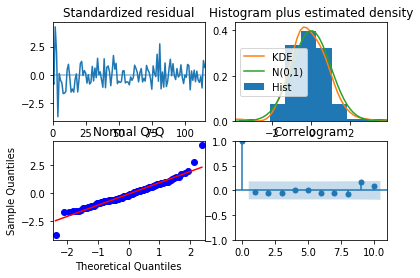

In [268]:
Rose_results_auto_SARIMA_6.plot_diagnostics()
plt.show()


#### Predict on the Test Set using this model and evaluate the model.


In [269]:
Rose_predicted_auto_SARIMA_6 = Rose_results_auto_SARIMA_6.get_forecast(steps=len(Rose_test))
Rose_predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()


y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.841513  18.848127  25.899862      99.783164    
1  67.630955  19.299908  29.803831      105.458079   
2  74.746991  19.412471  36.699247      112.794736   
3  71.326028  19.475426  33.154894      109.497162   
4  76.017882  19.483709  37.830513      114.205251

In [270]:
Rose_SARIMA_rmse_06 = mean_squared_error(Rose_test['Rose'],Rose_predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(color.BOLD+color.BLUE+"For SARIMA with seasonality 06 on the Test Data,  RMSE is %3.3f" %(Rose_SARIMA_rmse_06))


For SARIMA with seasonality 06 on the Test Data,  RMSE is 26.160


In [271]:
Rose_SARIMA_df_06 = pd.DataFrame({'Test RMSE': [Rose_SARIMA_rmse_06]}
                           ,index=['SARIMA_06_Seasonality'])


In [272]:
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_SARIMA_df_06])
Rose_resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904
Alpha=0.2,DoubleExponentialSmoothing    65.754737
Alpha=0.05,DoubleExponentialSmoothing   18.636392
Alpha=0.15,DoubleExponentialSmoothing   41.382452
Alpha=0.2,TripleExponentialSmoothing    41.382452
Alpha=0.95,TripleExponentialSmoothing   78.552491
Alpha=0.15,TripleExponentialSmoothing   70.595962
ARIMA                                   15.626467
SARIMA_06_Seasonality                   26.160412

## SARIMA with seasonality 12 - Rose Model


In [273]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))


Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [274]:
Rose_SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC'])


In [275]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        Rose_SARIMA_AIC_12 = Rose_SARIMA_AIC_12.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207355
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380894
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386352
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752475
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697528
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945568
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383813
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491873
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094709
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483305449
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535943
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461658
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988258364461
SARIMA(0, 1, 2)x(0, 0, 

In [276]:
Rose_SARIMA_AIC_12.sort_values(by=['AIC']).head()


param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.871767
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [277]:
Rose_auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Rose_results_auto_SARIMA_12 = Rose_auto_SARIMA_12.fit(maxiter=1000)
print(Rose_results_auto_SARIMA_12.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 21 Feb 2021   AIC                            887.938
Time:                                    22:32:48   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    190.102     -0.004      0.996    -373.435     371.750
ma.L2         -0.1573     29.866   

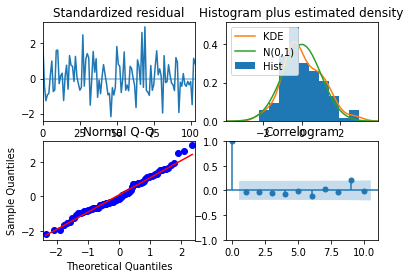

In [278]:

Rose_results_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.


In [279]:
Rose_predicted_auto_SARIMA_12 = Rose_results_auto_SARIMA_12.get_forecast(steps=len(Rose_test))
Rose_predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()


y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867266  15.928501  31.647977      94.086554    
1  70.541191  16.147659  38.892360      102.190021   
2  77.356411  16.147657  45.707585      109.005237   
3  76.208814  16.147657  44.559988      107.857640   
4  72.747398  16.147657  41.098572      104.396224

In [280]:
Rose_SARIMA_rmse_12 = mean_squared_error(Rose_test['Rose'],Rose_predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(color.BOLD+color.BLUE+"For SARIMA with seasonality 12 on the Test Data,  RMSE is %3.3f" %(Rose_SARIMA_rmse_12))


For SARIMA with seasonality 12 on the Test Data,  RMSE is 26.949


In [281]:

Rose_SARIMA_df_12 = pd.DataFrame({'Test RMSE': [Rose_SARIMA_rmse_12]}
                           ,index=['SARIMA_12_Seasonality'])

In [282]:
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_SARIMA_df_12])
Rose_resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904
Alpha=0.2,DoubleExponentialSmoothing    65.754737
Alpha=0.05,DoubleExponentialSmoothing   18.636392
Alpha=0.15,DoubleExponentialSmoothing   41.382452
Alpha=0.2,TripleExponentialSmoothing    41.382452
Alpha=0.95,TripleExponentialSmoothing   78.552491
Alpha=0.15,TripleExponentialSmoothing   70.595962
ARIMA                                   15.626467
SARIMA_06_Seasonality                   26.160412
SARIMA_12_Seasonality                   26.949020

***
<h2>7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.</h2>
<br>
<h3>Solution:</h3>

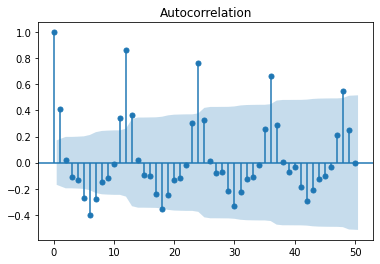

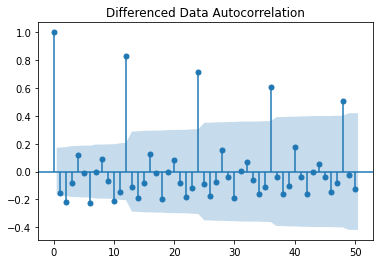

In [283]:
plot_acf(Sparkling_train['Sparkling'],lags=50)
plot_acf(Sparkling_train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

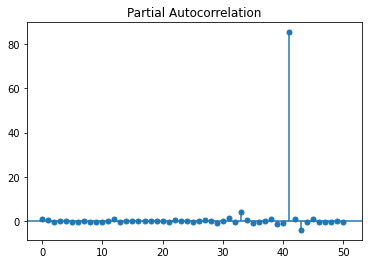

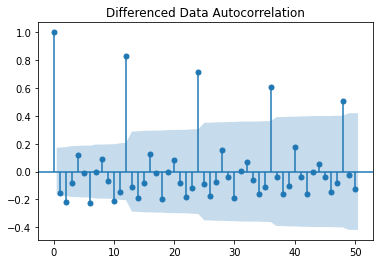

In [284]:
plot_pacf(Sparkling_train['Sparkling'],lags=50)
plot_acf(Sparkling_train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

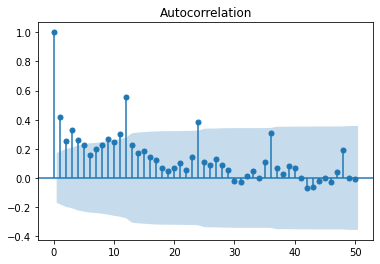

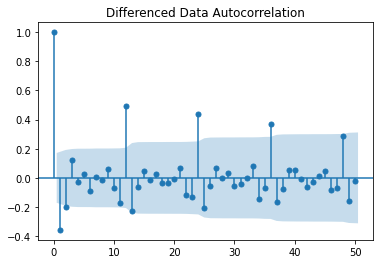

In [285]:
plot_acf(Rose_train['Rose'],lags=50)
plot_acf(Rose_train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

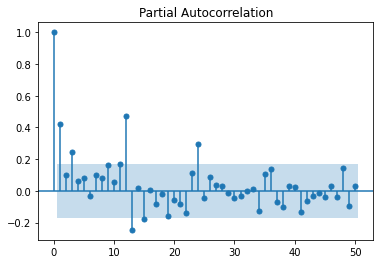

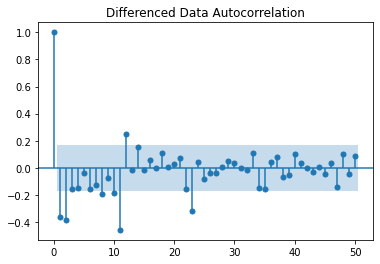

In [286]:
plot_pacf(Rose_train['Rose'],lags=50)
plot_pacf(Rose_train['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

### From above differential plot we infer value for p,d,q as (0,1,0)

## ARIMA ACF Sparkling

In [287]:
Sparkling_ACF_ARIMA = ARIMA(Sparkling_train_st['Sparkling'], order=(0,1,0),freq='MS')

Sparkling_results_ACF_ARIMA = Sparkling_ACF_ARIMA.fit()

print(Sparkling_results_ACF_ARIMA.summary())


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  130
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1178.520
Method:                           css   S.D. of innovations           2093.511
Date:                Sun, 21 Feb 2021   AIC                           2361.040
Time:                        22:32:50   BIC                           2366.775
Sample:                    03-01-1980   HQIC                          2363.370
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2769    183.613      0.078      0.938    -345.598     374.152


## Predict on the Test Set using this model and evaluate the model.

In [288]:
Sparkling_predicted_ACF_ARIMA = Sparkling_results_ACF_ARIMA.forecast(steps=len(Sparkling_test))

In [289]:
Sparkling_ARIMA_ACF_rmse = mean_squared_error(Sparkling_test['Sparkling'],Sparkling_predicted_ACF_ARIMA[0],squared=False)

print(color.BOLD+color.BLUE+"For ARIMA model forecast on the Testing Data,  RMSE is %3.3f" %(Sparkling_ARIMA_ACF_rmse))


For ARIMA model forecast on the Testing Data,  RMSE is 1310.131


In [290]:
Sparkling_ARIMA_ACF_df = pd.DataFrame({'Test RMSE': [Sparkling_ARIMA_ACF_rmse]}
                           ,index=['ACF ARIMA'])


In [291]:
Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_ARIMA_ACF_df])
Sparkling_resultsDf

Test RMSE
Linear Regression                                1389.135175
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                      770.928742 
4pointTrailingMovingAverage                      1137.137053
6pointTrailingMovingAverage                      1283.096993
9pointTrailingMovingAverage                      1354.277938
Alpha=0.2,SimpleExponentialSmoothing             1595.206839
Alpha=0.095,SimpleExponentialSmoothing           1368.363598
Alpha=0.0,SimpleExponentialSmoothing             1275.081823
Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  1466.899629
Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing  1571.868573
Alpha=0.2,DoubleExponentialSmoothing             1595.206839
Alpha=0.2,TripleExponentialSmoothing             1595.206839
Alpha=0.05,TripleExponentialSmoothing            1466.899629
Alpha=0.2,TripleExponentialSmoothing             1275.081823
AUTO ARIMA                                       1417.492916
SARIMA_06_Seasonality                            626.890392 
SARIMA_12_Seasonality                            546.515469 
ACF ARIMA                                        1310.130989

### ARIMA ACF Rose

In [292]:
Rose_ACF_ARIMA = ARIMA(Rose_train_st['Rose'], order=(0,1,0),freq='MS')


In [293]:
Rose_results_ACF_ARIMA = Rose_ACF_ARIMA.fit()

print(Rose_results_ACF_ARIMA.summary())


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  130
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -725.843
Method:                           css   S.D. of innovations             64.358
Date:                Sun, 21 Feb 2021   AIC                           1455.686
Time:                        22:32:51   BIC                           1461.421
Sample:                    03-01-1980   HQIC                          1458.016
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1231      5.645      0.022      0.983     -10.940      11.186


#### Predict on the Test Set using this model and evaluate the model.


In [294]:
Rose_predicted_ACF_ARIMA = Rose_results_ACF_ARIMA.forecast(steps=len(Rose_test))


In [295]:
Rose_ARIMA_ACF_rmse = mean_squared_error(Rose_test['Rose'],Rose_predicted_ACF_ARIMA[0],squared=False)

print(color.BOLD+color.BLUE+"For ARIMA model forecast on the Testing Data,  RMSE is %3.3f" %(Rose_ARIMA_ACF_rmse))


For ARIMA model forecast on the Testing Data,  RMSE is 32.918


In [296]:
Rose_ARIMA_ACF_df = pd.DataFrame({'Test RMSE': [Rose_ARIMA_ACF_rmse]}
                           ,index=['ACF ARIMA'])


In [297]:

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_ARIMA_ACF_df])
Rose_resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904
Alpha=0.2,DoubleExponentialSmoothing    65.754737
Alpha=0.05,DoubleExponentialSmoothing   18.636392
Alpha=0.15,DoubleExponentialSmoothing   41.382452
Alpha=0.2,TripleExponentialSmoothing    41.382452
Alpha=0.95,TripleExponentialSmoothing   78.552491
Alpha=0.15,TripleExponentialSmoothing   70.595962
ARIMA                                   15.626467
SARIMA_06_Seasonality                   26.160412
SARIMA_12_Seasonality                   26.949020
ACF ARIMA                               32.917776

In [298]:
### SARIMA 06 manual Sparkling

In [299]:
Sparkling_ACF_SARIMA_6 = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Sparkling_results_ACF_SARIMA_6 = Sparkling_ACF_SARIMA_6.fit(maxiter=1000)
print(Sparkling_results_ACF_SARIMA_6.summary())


                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 0, [1, 2], 6)   Log Likelihood                -900.459
Date:                                Sun, 21 Feb 2021   AIC                           1810.918
Time:                                        22:32:52   BIC                           1824.771
Sample:                                             0   HQIC                          1816.543
                                                - 132                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6        0.0038      0.031      0.120      0.904      -0.058       0.065
ar.

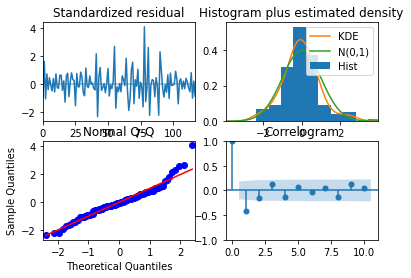

In [300]:
Sparkling_results_ACF_SARIMA_6.plot_diagnostics()
plt.show()


## Predict on the Test Set using this model and evaluate the model.


In [301]:
Sparkling_predicted_ACF_SARIMA_6 = Sparkling_results_ACF_SARIMA_6.get_forecast(steps=len(Sparkling_test))
Sparkling_predicted_ACF_SARIMA_6.summary_frame(alpha=0.05).head()


y         mean      mean_se  mean_ci_lower  mean_ci_upper
0  809.296859   496.085419  -163.012696     1781.606414  
1  492.938133   701.570350  -882.114485     1867.990751  
2  1004.991829  859.244533  -679.096510     2689.080168  
3  858.258153   992.170036  -1086.359384    2802.875689  
4  745.785468   1109.279763 -1428.362915    2919.933852

In [302]:
Sparkling_SARIMA_ACF_rmse_06 = mean_squared_error(Sparkling_test['Sparkling'],Sparkling_predicted_ACF_SARIMA_6.predicted_mean,squared=False)
print(color.BOLD+color.BLUE+"For SARIMA with seasonality 06 on the Test Data,  RMSE is %3.3f" %(Sparkling_SARIMA_ACF_rmse_06))


For SARIMA with seasonality 06 on the Test Data,  RMSE is 1826.405


In [303]:
Sparkling_SARIMA_ACF_df_06 = pd.DataFrame({'Test RMSE': [Sparkling_SARIMA_ACF_rmse_06]}
                           ,index=['SARIMA_ACF_06_Seasonality'])


In [304]:
Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_SARIMA_ACF_df_06])
Sparkling_resultsDf

Test RMSE
Linear Regression                                1389.135175
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                      770.928742 
4pointTrailingMovingAverage                      1137.137053
6pointTrailingMovingAverage                      1283.096993
9pointTrailingMovingAverage                      1354.277938
Alpha=0.2,SimpleExponentialSmoothing             1595.206839
Alpha=0.095,SimpleExponentialSmoothing           1368.363598
Alpha=0.0,SimpleExponentialSmoothing             1275.081823
Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  1466.899629
Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing  1571.868573
Alpha=0.2,DoubleExponentialSmoothing             1595.206839
Alpha=0.2,TripleExponentialSmoothing             1595.206839
Alpha=0.05,TripleExponentialSmoothing            1466.899629
Alpha=0.2,TripleExponentialSmoothing             1275.081823
AUTO ARIMA                                       1417.492916
SARIMA_06_Seasonality                            626.890392 
SARIMA_12_Seasonality                            546.515469 
ACF ARIMA                                        1310.130989
SARIMA_ACF_06_Seasonality                        1826.405290

### SARIMA 12 manual Sparkling


In [305]:
Sparkling_ACF_SARIMA_12 = sm.tsa.statespace.SARIMAX(Sparkling_train['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Sparkling_results_ACF_SARIMA_12 = Sparkling_ACF_SARIMA_12.fit(maxiter=1000)
print(Sparkling_results_ACF_SARIMA_12.summary())


                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood                -810.495
Date:                                 Sun, 21 Feb 2021   AIC                           1630.990
Time:                                         22:32:53   BIC                           1644.307
Sample:                                              0   HQIC                          1636.387
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.7464      0.589      1.267      0.205      -0.408       1

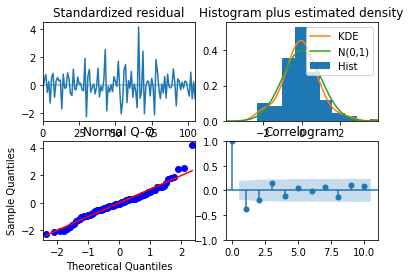

In [306]:
Sparkling_results_ACF_SARIMA_12.plot_diagnostics()
plt.show()


## Predict on the Test Set using this model and evaluate the model.


In [307]:
Sparkling_predicted_ACF_SARIMA_12 = Sparkling_results_ACF_SARIMA_12.get_forecast(steps=len(Sparkling_test))
Sparkling_predicted_ACF_SARIMA_12.summary_frame(alpha=0.05).head()


y        mean      mean_se  mean_ci_lower  mean_ci_upper
0  758.418220  503.549339  -228.520348     1745.356789  
1  462.148052  712.119974  -933.581449     1857.877553  
2  944.082834  872.162701  -765.324649     2653.490317  
3  818.571190  1007.085248 -1155.279626    2792.422007  
4  678.536411  1125.954536 -1528.293928    2885.366751

In [308]:
Sparkling_SARIMA_ACF_rmse_12 = mean_squared_error(Sparkling_test['Sparkling'],Sparkling_predicted_ACF_SARIMA_12.predicted_mean,squared=False)
print(color.BOLD+color.BLUE+"For SARIMA with seasonality 12 on the Test Data,  RMSE is %3.3f" %(Sparkling_SARIMA_ACF_rmse_12))


For SARIMA with seasonality 12 on the Test Data,  RMSE is 1878.862


In [309]:
Sparkling_SARIMA_ACF_df_12 = pd.DataFrame({'Test RMSE': [Sparkling_SARIMA_ACF_rmse_12]}
                           ,index=['SARIMA_ACF_12_Seasonality'])


In [310]:

Sparkling_resultsDf = pd.concat([Sparkling_resultsDf, Sparkling_SARIMA_ACF_df_12])
Sparkling_resultsDf

Test RMSE
Linear Regression                                1389.135175
NaiveModel                                       3864.279352
SimpleAverageModel                               1275.081804
2pointTrailingMovingAverage                      770.928742 
4pointTrailingMovingAverage                      1137.137053
6pointTrailingMovingAverage                      1283.096993
9pointTrailingMovingAverage                      1354.277938
Alpha=0.2,SimpleExponentialSmoothing             1595.206839
Alpha=0.095,SimpleExponentialSmoothing           1368.363598
Alpha=0.0,SimpleExponentialSmoothing             1275.081823
Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  1466.899629
Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing  1571.868573
Alpha=0.2,DoubleExponentialSmoothing             1595.206839
Alpha=0.2,TripleExponentialSmoothing             1595.206839
Alpha=0.05,TripleExponentialSmoothing            1466.899629
Alpha=0.2,TripleExponentialSmoothing             1275.081823
AUTO ARIMA                                       1417.492916
SARIMA_06_Seasonality                            626.890392 
SARIMA_12_Seasonality                            546.515469 
ACF ARIMA                                        1310.130989
SARIMA_ACF_06_Seasonality                        1826.405290
SARIMA_ACF_12_Seasonality                        1878.862278

### SARIMA 06 manual Rose


In [311]:
Rose_ACF_SARIMA_06 = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                order=(0, 1, 0),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Rose_results_ACF_SARIMA_06 = Rose_ACF_SARIMA_06.fit(maxiter=1000)
print(Rose_results_ACF_SARIMA_06.summary())


                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 0, [1, 2], 6)   Log Likelihood                -553.511
Date:                                Sun, 21 Feb 2021   AIC                           1117.022
Time:                                        22:32:54   BIC                           1130.876
Sample:                                             0   HQIC                          1122.647
                                                - 132                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.0950      0.040     -2.373      0.018      -0.173      -0.017
ar.

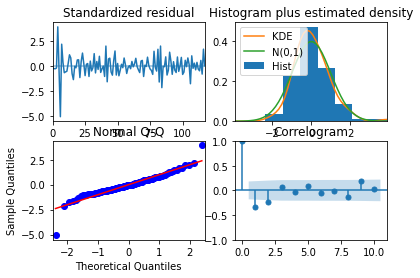

In [312]:
Rose_results_ACF_SARIMA_06.plot_diagnostics()
plt.show()


## Predict on the Test Set using this model and evaluate the model.


In [313]:
Rose_predicted_ACF_SARIMA_06 = Rose_results_ACF_SARIMA_06.get_forecast(steps=len(Rose_test))
Rose_predicted_ACF_SARIMA_06.summary_frame(alpha=0.05).head()


y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  84.353731  25.220387  34.922682      133.784781   
1  85.729014  35.647786  15.860638      155.597390   
2  94.973317  43.651590  9.417772       180.528862   
3  90.359530  50.399981 -8.422617       189.141678   
4  95.731739  56.345850 -14.704098      206.167575

In [314]:
Rose_SARIMA_ACF_rmse_06 = mean_squared_error(Rose_test['Rose'],Rose_predicted_ACF_SARIMA_06.predicted_mean,squared=False)
print(color.BOLD+color.BLUE+"For SARIMA with seasonality 06 on the Test Data,  RMSE is %3.3f" %(Rose_SARIMA_ACF_rmse_06))


For SARIMA with seasonality 06 on the Test Data,  RMSE is 53.206


In [315]:
Rose_SARIMA_ACF_df_06 = pd.DataFrame({'Test RMSE': [Rose_SARIMA_ACF_rmse_06]}
                           ,index=['SARIMA_ACF_06_Seasonality'])


In [316]:

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_SARIMA_ACF_df_06])
Rose_resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904
Alpha=0.2,DoubleExponentialSmoothing    65.754737
Alpha=0.05,DoubleExponentialSmoothing   18.636392
Alpha=0.15,DoubleExponentialSmoothing   41.382452
Alpha=0.2,TripleExponentialSmoothing    41.382452
Alpha=0.95,TripleExponentialSmoothing   78.552491
Alpha=0.15,TripleExponentialSmoothing   70.595962
ARIMA                                   15.626467
SARIMA_06_Seasonality                   26.160412
SARIMA_12_Seasonality                   26.949020
ACF ARIMA                               32.917776
SARIMA_ACF_06_Seasonality               53.206145

### SARIMA 12 manual Rose


In [317]:
Rose_ACF_SARIMA_12 = sm.tsa.statespace.SARIMAX(Rose_train['Rose'].values,
                                order=(0, 1, 0),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Rose_results_ACF_SARIMA_12 = Rose_ACF_SARIMA_12.fit(maxiter=1000)
print(Rose_results_ACF_SARIMA_12.summary())


                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood                -472.787
Date:                                 Sun, 21 Feb 2021   AIC                            955.574
Time:                                         22:32:55   BIC                            968.891
Sample:                                              0   HQIC                           960.971
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.4774      0.084      5.657      0.000       0.312       0

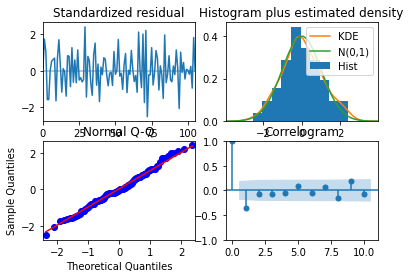

In [318]:
Rose_results_ACF_SARIMA_12.plot_diagnostics()
plt.show()


## Predict on the Test Set using this model and evaluate the model.


In [319]:
Rose_predicted_ACF_SARIMA_12 = Rose_results_ACF_SARIMA_12.get_forecast(steps=len(Rose_test))
Rose_predicted_ACF_SARIMA_12.summary_frame(alpha=0.05).head()


y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  74.235118  20.782375  33.502412      114.967824   
1  87.365796  29.390687  29.761107      144.970484   
2  89.420420  35.996082  18.869396      159.971444   
3  88.418299  41.564688  6.953007       169.883591   
4  86.490605  46.470730 -4.590351       177.571562

In [320]:
Rose_SARIMA_ACF_rmse_12 = mean_squared_error(Rose_test['Rose'],Rose_predicted_ACF_SARIMA_12.predicted_mean,squared=False)
print(color.BOLD+color.BLUE+"For SARIMA with seasonality 12 on the Test Data,  RMSE is %3.3f" %(Rose_SARIMA_ACF_rmse_12))


For SARIMA with seasonality 12 on the Test Data,  RMSE is 46.845


In [321]:
Rose_SARIMA_ACF_df_12 = pd.DataFrame({'Test RMSE': [Rose_SARIMA_ACF_rmse_12]}
                           ,index=['SARIMA_ACF_12_Seasonality'])


In [322]:

Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_SARIMA_ACF_df_12])
Rose_resultsDf

Test RMSE
RegressionOnTime                        15.275732
NaiveModel                              79.738550
SimpleAverageModel                      53.480857
2pointTrailingMovingAverage             10.354816
4pointTrailingMovingAverage             13.729109
6pointTrailingMovingAverage             14.060788
9pointTrailingMovingAverage             14.374411
Alpha=0.2,SimpleExponentialSmoothing    41.382452
Alpha=0.095,SimpleExponentialSmoothing  36.727741
Alpha=0.098,SimpleExponentialSmoothing  36.816904
Alpha=0.2,DoubleExponentialSmoothing    65.754737
Alpha=0.05,DoubleExponentialSmoothing   18.636392
Alpha=0.15,DoubleExponentialSmoothing   41.382452
Alpha=0.2,TripleExponentialSmoothing    41.382452
Alpha=0.95,TripleExponentialSmoothing   78.552491
Alpha=0.15,TripleExponentialSmoothing   70.595962
ARIMA                                   15.626467
SARIMA_06_Seasonality                   26.160412
SARIMA_12_Seasonality                   26.949020
ACF ARIMA                               32.917776
SARIMA_ACF_06_Seasonality               53.206145
SARIMA_ACF_12_Seasonality               46.845349

***
<h2>8.Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.</h2>
<br>
<h3>Solution:</h3>

## Rose Data Set Results

In [323]:
Rose_resultsDf.sort_values(by='Test RMSE',ascending=True).T

2pointTrailingMovingAverage  4pointTrailingMovingAverage  \
Test RMSE  10.354816                    13.729109                     

           6pointTrailingMovingAverage  9pointTrailingMovingAverage  \
Test RMSE  14.060788                    14.374411                     

           RegressionOnTime      ARIMA  Alpha=0.05,DoubleExponentialSmoothing  \
Test RMSE  15.275732         15.626467  18.636392                               

           SARIMA_06_Seasonality  SARIMA_12_Seasonality  ACF ARIMA  \
Test RMSE  26.160412              26.94902               32.917776   

           Alpha=0.095,SimpleExponentialSmoothing  \
Test RMSE  36.727741                                

           Alpha=0.098,SimpleExponentialSmoothing  \
Test RMSE  36.816904                                

           Alpha=0.2,SimpleExponentialSmoothing  \
Test RMSE  41.382452                              

           Alpha=0.15,DoubleExponentialSmoothing  \
Test RMSE  41.382452                               

           Alpha=0.2,TripleExponentialSmoothing  SARIMA_ACF_12_Seasonality  \
Test RMSE  41.382452                             46.845349                   

           SARIMA_ACF_06_Seasonality  SimpleAverageModel  \
Test RMSE  53.206145                  53.480857            

           Alpha=0.2,DoubleExponentialSmoothing  \
Test RMSE  65.754737                              

           Alpha=0.15,TripleExponentialSmoothing  \
Test RMSE  70.595962                               

           Alpha=0.95,TripleExponentialSmoothing  NaiveModel  
Test RMSE  78.552491                              79.73855

## Sparkling Data Set Results

In [324]:
Sparkling_resultsDf.sort_values(by='Test RMSE',ascending=True).T

SARIMA_12_Seasonality  SARIMA_06_Seasonality  \
Test RMSE  546.515469             626.890392              

           2pointTrailingMovingAverage  4pointTrailingMovingAverage  \
Test RMSE  770.928742                   1137.137053                   

           SimpleAverageModel  Alpha=0.0,SimpleExponentialSmoothing  \
Test RMSE  1275.081804         1275.081823                            

           Alpha=0.2,TripleExponentialSmoothing  6pointTrailingMovingAverage  \
Test RMSE  1275.081823                           1283.096993                   

             ACF ARIMA  9pointTrailingMovingAverage  \
Test RMSE  1310.130989  1354.277938                   

           Alpha=0.095,SimpleExponentialSmoothing  Linear Regression  \
Test RMSE  1368.363598                             1389.135175         

            AUTO ARIMA  Alpha=0.05,TripleExponentialSmoothing  \
Test RMSE  1417.492916  1466.899629                             

           Alpha=0.05,Slope=0.1,DoubleExponentialSmoothing  \
Test RMSE  1466.899629                                       

           Alpha=0.05,Slope=0.3,DoubleExponentialSmoothing  \
Test RMSE  1571.868573                                       

           Alpha=0.2,DoubleExponentialSmoothing  \
Test RMSE  1595.206839                            

           Alpha=0.2,SimpleExponentialSmoothing  \
Test RMSE  1595.206839                            

           Alpha=0.2,TripleExponentialSmoothing  SARIMA_ACF_06_Seasonality  \
Test RMSE  1595.206839                           1826.40529                  

           SARIMA_ACF_12_Seasonality   NaiveModel  
Test RMSE  1878.862278                3864.279352

***
<h2>9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.</h2>
<br>
<h3>Solution: SARIMA model with Seasonlaity 12 is chosen as the optimum models to predict 12 months inot the future on complete data for both data sets</h3>

## SPARKLING DATA SET

In [325]:
Sparkling_FullData_SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC'])

In [326]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_SPARKLING_WINE = sm.tsa.statespace.SARIMAX(Sparkling_df['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        Sparkling_FullData_SARIMA_AIC_12 = Sparkling_FullData_SARIMA_AIC_12.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:890.6687980825523
SARIMA(0, 1, 2)x(0, 0, 0, 12

In [327]:
Sparkling_FullData_SARIMA_AIC_12.sort_values(by=['AIC']).head()


param       seasonal         AIC
0   (0, 1, 0)  (0, 0, 0, 12)  890.668798
57  (2, 1, 0)  (1, 0, 0, 12)  890.668798
56  (2, 1, 0)  (0, 0, 2, 12)  890.668798
55  (2, 1, 0)  (0, 0, 1, 12)  890.668798
54  (2, 1, 0)  (0, 0, 0, 12)  890.668798

In [328]:
Sparkling_FullData_auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(Sparkling_df['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Sparkling_resultsFull_auto_SARIMA_12 = Sparkling_FullData_auto_SARIMA_12.fit(maxiter=1000)
print(Sparkling_resultsFull_auto_SARIMA_12.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -1173.399
Date:                            Sun, 21 Feb 2021   AIC                           2360.798
Time:                                    22:34:40   BIC                           2382.281
Sample:                                         0   HQIC                          2369.522
                                            - 187                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8323      0.079    -10.518      0.000      -0.987      -0.677
ma.L2         -0.1229      0.082   

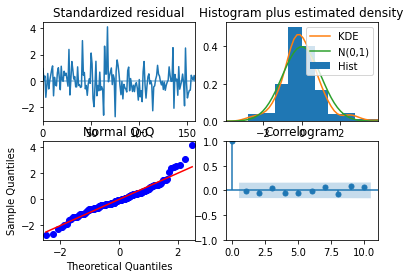

In [329]:

Sparkling_resultsFull_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Evaluate the model on the whole and predict 12 months into the future

In [330]:
SPARKLING_FullData_SARIMA_12 = Sparkling_resultsFull_auto_SARIMA_12.get_forecast(steps=12)

In [331]:
SPARKLING_FullData_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1865.494547  383.013629  1114.801628    2616.187466  
1  2461.795462  388.360460  1700.622947    3222.967977  
2  3319.007141  388.738942  2557.092816    4080.921466  
3  4017.349818  389.117055  3254.694405    4780.005231  
4  6281.367636  389.494803  5517.971851    7044.763422

In [332]:
rmse_spakling_full = mean_squared_error(Sparkling_df['Sparkling'],Sparkling_resultsFull_auto_SARIMA_12.fittedvalues,squared=False)
print(color.BOLD+color.BLUE,'RMSE of the Full Model',rmse_spakling_full)

 RMSE of the Full Model 524.6536199851724


In [333]:
pred_full_manual_SARIMA_date = SPARKLING_FullData_SARIMA_12.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-01', freq='MS'))

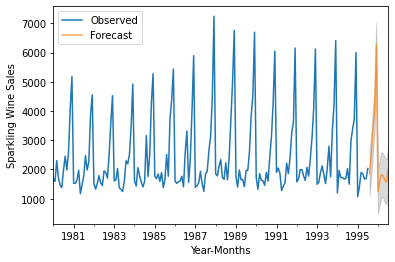

In [334]:
# plot the forecast along with the confidence band

axis = Sparkling_df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.show()

## Rose Data Set

In [335]:
Rose_df1=pd.DataFrame(Rose)

In [336]:
Rose_FullData_SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC'])

In [337]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_SPARKLING_WINE = sm.tsa.statespace.SARIMAX(Rose_df1['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        Rose_FullData_SARIMA_AIC_12 = Rose_FullData_SARIMA_AIC_12.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:890.6687980825523
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:890.6687980825523
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:890.6687980825523
SARIMA(0, 1, 2)x(0, 0, 0, 12

In [338]:
Rose_FullData_SARIMA_AIC_12.sort_values(by=['AIC']).head()


param       seasonal         AIC
0   (0, 1, 0)  (0, 0, 0, 12)  890.668798
57  (2, 1, 0)  (1, 0, 0, 12)  890.668798
56  (2, 1, 0)  (0, 0, 2, 12)  890.668798
55  (2, 1, 0)  (0, 0, 1, 12)  890.668798
54  (2, 1, 0)  (0, 0, 0, 12)  890.668798

In [339]:
Rose_FullData_auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(Rose_df1['Rose'].values,
                                order=(0, 1, 0),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Rose_resultsFull_auto_SARIMA_12 = Rose_FullData_auto_SARIMA_12.fit(maxiter=1000)
print(Rose_resultsFull_auto_SARIMA_12.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  187
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -920.705
Date:                Sun, 21 Feb 2021   AIC                           1843.410
Time:                        22:36:20   BIC                           1846.631
Sample:                             0   HQIC                          1844.715
                                - 187                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1231.1467     77.614     15.862      0.000    1079.026    1383.268
Ljung-Box (Q):                      272.02   Jarque-Bera (JB):               122.70
Prob(Q):                              0.00   Pr

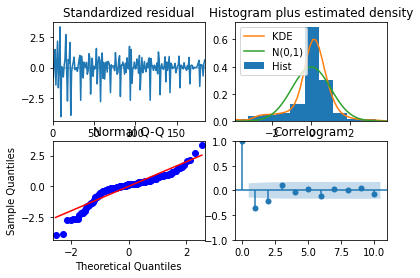

In [340]:

Rose_resultsFull_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Evaluate the model on the whole and predict 12 months into the future


In [341]:
ROSE_FullData_SARIMA_12 = Rose_resultsFull_auto_SARIMA_12.get_forecast(steps=12)


In [342]:
ROSE_FullData_SARIMA_12.summary_frame(alpha=0.05).head()


y  mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.0  35.087700 -6.770629       130.770629   
1  62.0  49.621502 -35.256356      159.256356   
2  62.0  60.773679 -57.114223      181.114223   
3  62.0  70.175400 -75.541257      199.541257   
4  62.0  78.458483 -91.775801      215.775801

In [343]:
rmse_rose_full = mean_squared_error(Rose_df1['Rose'],Rose_resultsFull_auto_SARIMA_12.fittedvalues,squared=False)
print(color.BOLD+color.BLUE,'RMSE of the Full Model',rmse_rose_full)



 RMSE of the Full Model 35.85025302157894


In [344]:
pred_full_manual_SARIMA_date_rose = ROSE_FullData_SARIMA_12.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-01', freq='MS'))
pred_full_manual_SARIMA_date_rose

y           mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  62.0  35.087700  -6.770629       130.770629   
1995-09-01  62.0  49.621502  -35.256356      159.256356   
1995-10-01  62.0  60.773679  -57.114223      181.114223   
1995-11-01  62.0  70.175400  -75.541257      199.541257   
1995-12-01  62.0  78.458483  -91.775801      215.775801   
1996-01-01  62.0  85.946962  -106.452950     230.452950   
1996-02-01  62.0  92.833329  -119.949981     243.949981   
1996-03-01  62.0  99.243003  -132.512712     256.512712   
1996-04-01  62.0  105.263101 -144.311886     268.311886   
1996-05-01  62.0  110.957051 -155.471823     279.471823   
1996-06-01  62.0  116.372736 -166.086372     290.086372   
1996-07-01  62.0  121.547359 -176.228446     300.228446

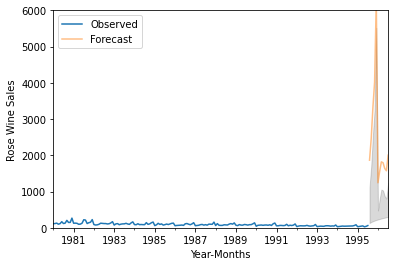

In [345]:
# plot the forecast along with the confidence band

axis = Rose_df1['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_full_manual_SARIMA_date_rose.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date_rose['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose Wine Sales')
plt.legend(loc='best')
plt.ylim(bottom=0)
plt.ylim(top=6000)
plt.show()

***
<h2>10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

<h2>Inference : </h2>

1.1 It seems the reduction in Sales of Rose Wine is impacted due to Sparkling Wine; to ensure sales of both wines is profitable discount on purchase of both wines together can be provided to customers or a new Product such as wine box can be introduced which sells both sparkling and Rose wine.
1.2 Second option to ensure sales of both wines is profitable by creating a sub brand of Rose Wine under Sparkling Wine.

2. Company can associate with certain food companies and provide combined discounts on purchase of Wine adjacent food products along with Wine to increase wine sales all over the year.

3. Sales behaviour for Sparkling wine predicted for future 12 months has the same pattern as of the given period(1980 to 1995), where sales increases after July. While sales of Rose Wine shows an incresing trend for future next 12 months.

3. To ensure sales is profitable in low selling months from January to July company can indulge in below activities :
    -> Significant discounts to corporates.
    -> Wine Tasting events.
    



<h2>End of Report</h2>